In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
import os

print(os.listdir('./gdrive/MyDrive/SHIFT_ML/public_dat'))

['train.csv']


In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import os

print(os.listdir('./gdrive/MyDrive/SHIFT_ML/public_dat'))

['train.csv']


In [83]:
df = pd.read_csv('./gdrive/MyDrive/SHIFT_ML/public_dat/train.csv', index_col=0)
df

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
0,43,24.0,2014.0,1.0,10.0,1.0,1,8.294300,0.007122,0,...,0,6.907755,3.710396,6.725430,0,1.803359,6.616560,0,2014,5533460
1,66,3.0,1979.0,3.0,10.0,3.0,0,11.314231,0.232205,4,...,0,6.626122,2.764431,6.479615,1,2.631169,6.469948,1,2013,9900000
2,55,5.0,1979.0,2.0,6.0,2.0,0,11.718817,0.000170,5,...,0,6.368753,3.511844,6.192138,0,1.363537,6.462171,0,2012,1990000
3,45,7.0,1970.0,2.0,6.0,2.0,0,11.331032,0.428826,4,...,0,6.753601,1.814825,6.551080,0,2.732418,6.458229,0,2014,6500000
4,43,4.0,1968.0,2.0,6.0,2.0,0,11.538769,0.136330,6,...,0,6.636603,2.257588,6.646507,1,2.020222,6.634778,2,2014,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,56,19.0,1979.0,2.0,1.0,1.0,1,11.655744,0.049637,6,...,0,6.492240,2.711378,6.816188,0,3.297317,6.536155,0,2014,10159562
21325,42,5.0,1977.0,1.0,8.0,3.0,0,11.718817,0.000170,5,...,0,6.502295,3.802208,6.291569,0,1.442202,6.487684,0,2014,5100000
21326,32,3.0,1979.0,2.0,6.0,2.0,0,11.719940,0.000000,4,...,0,6.572814,3.062456,6.583520,1,2.733718,6.573904,2,2011,4800000
21327,43,4.0,1969.0,2.0,5.0,2.0,0,11.331032,0.428826,4,...,0,6.586172,2.408745,6.563982,0,3.034953,6.476311,0,2013,6300000


In [84]:
df.shape

(21329, 51)

In [85]:
print(df.shape)
df.info()

(21329, 51)
<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_cou

In [86]:
plt.figure(figsize = (70,30))

sns.set(font_scale=2)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix)<0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Фикс выбросов

In [87]:
df.full_sq.describe()

count    21329.000000
mean        54.088799
std         42.559522
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

Text(0.5, 1.0, 'histogram')

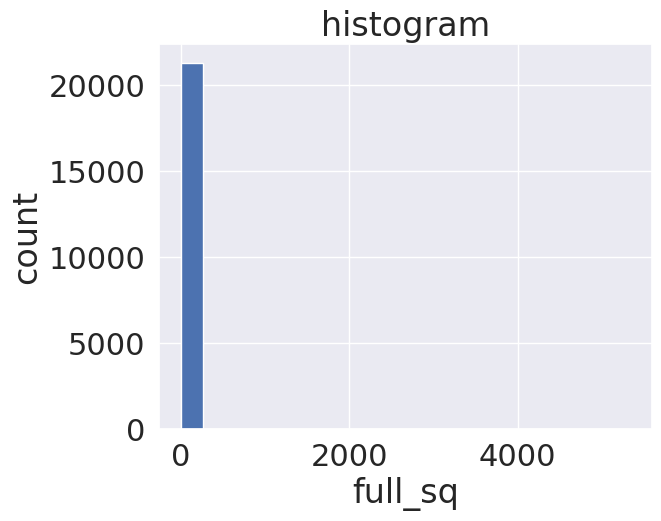

In [88]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['full_sq'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('full_sq')
plt.title('histogram')

In [89]:
#df = df[df.full_sq <= 637]
#df = df[df.full_sq > 0]

Text(0.5, 1.0, 'histogram')

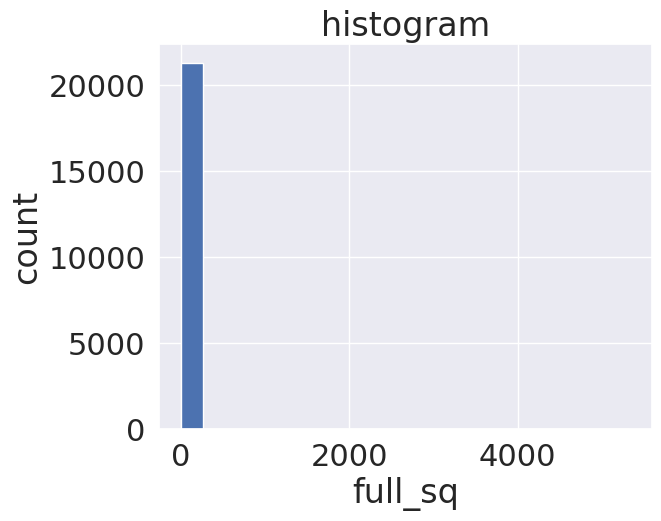

In [90]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['full_sq'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('full_sq')
plt.title('histogram')

In [91]:
df.floor.describe()

count    21329.000000
mean         7.660509
std          5.319822
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Text(0.5, 1.0, 'histogram')

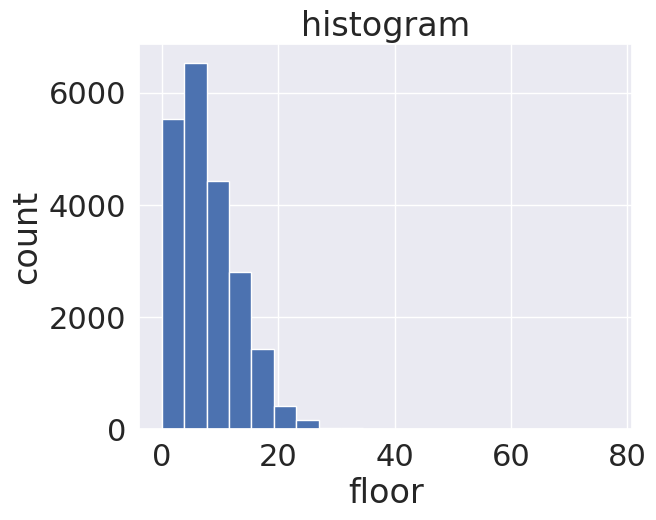

In [92]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['floor'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('floor')
plt.title('histogram')

In [93]:
#df = df[df.floor < 40]

Text(0.5, 1.0, 'histogram')

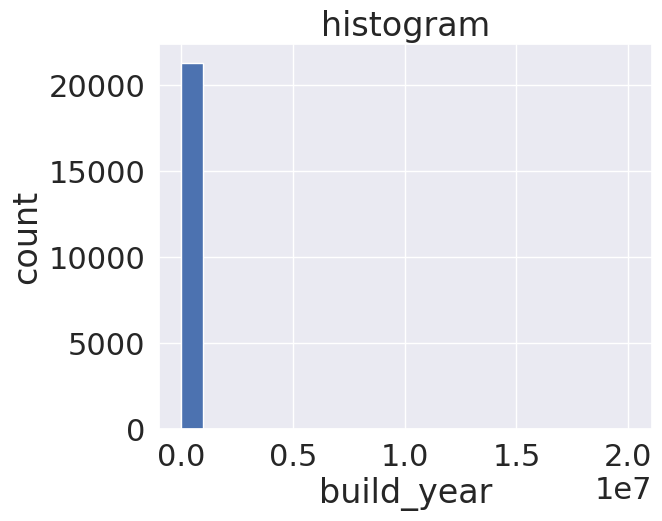

In [94]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['build_year'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('build_year')
plt.title('histogram')

In [95]:
#df = df[df.build_year < 5000]

In [96]:
df.state.describe()

count    21329.000000
mean         2.061606
std          0.667929
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         33.000000
Name: state, dtype: float64

In [97]:
#df = df[df.state < 5]

In [98]:
df.num_room.describe()

count    21329.000000
mean         1.938300
std          0.710045
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

Text(0.5, 1.0, 'histogram')

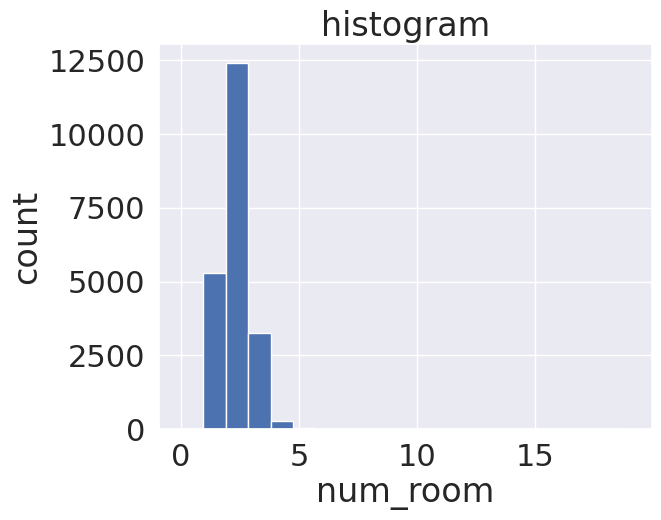

In [99]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['num_room'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('num_room')
plt.title('histogram')

In [100]:
#df = df[df.num_room <= 9]

## Обрезать выбросы в фичах на нашей моедли делаю сильно меньше метрик R2(иногда уменьшает rmse, но результат на codalab значетельно хуже)

<ipython-input-101-67f9b4a18ee0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 5))


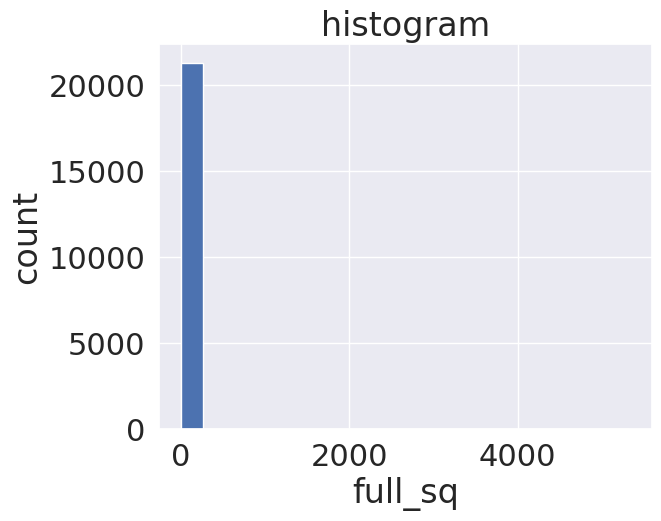

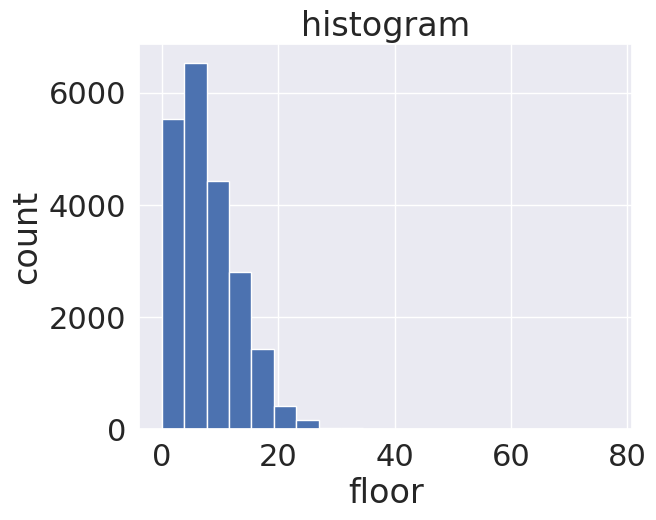

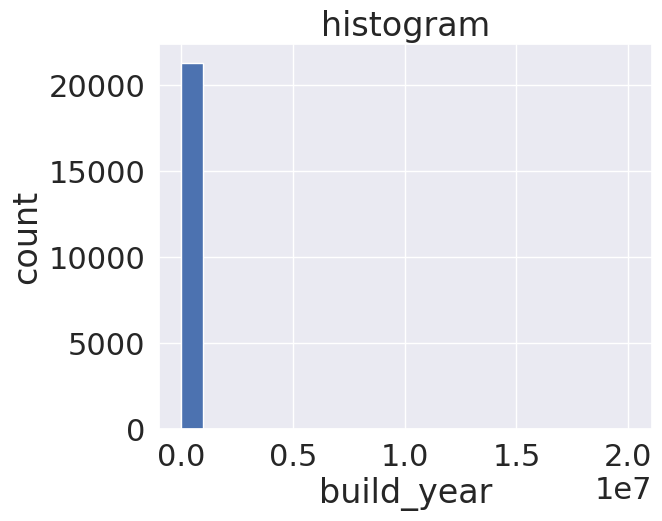

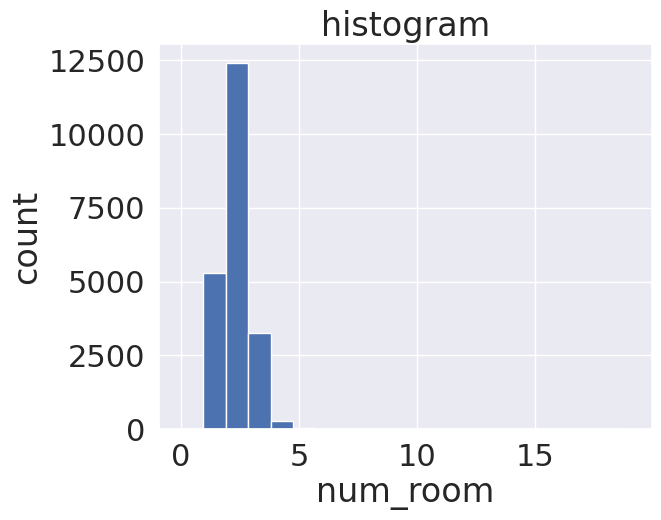

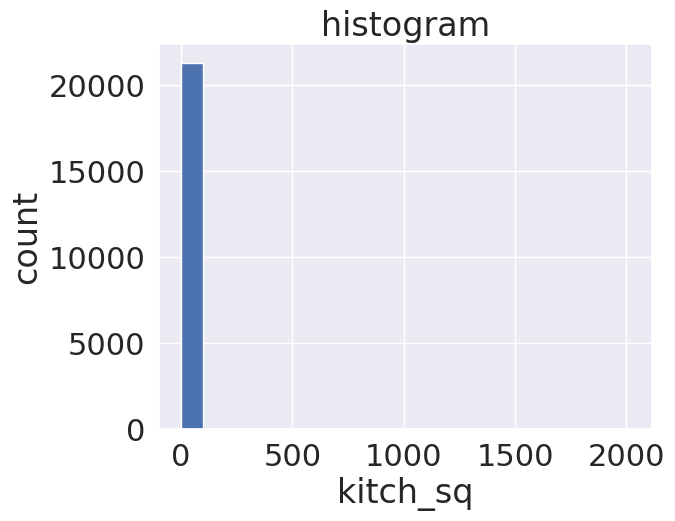

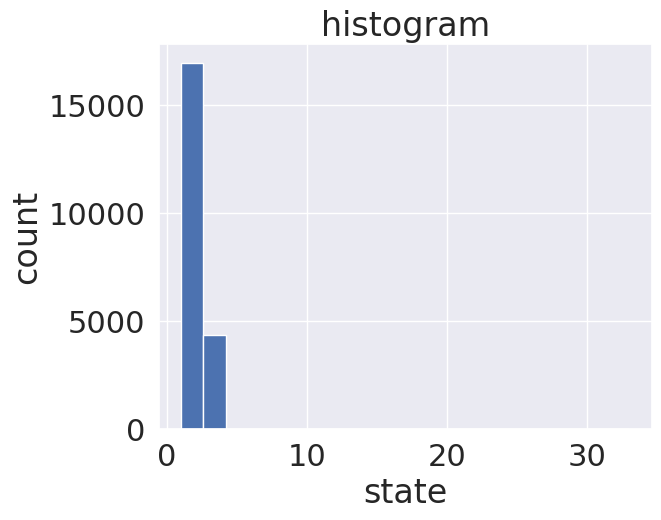

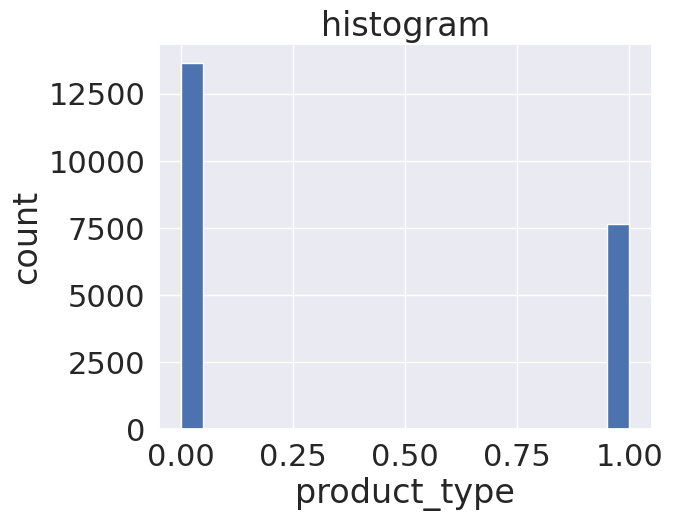

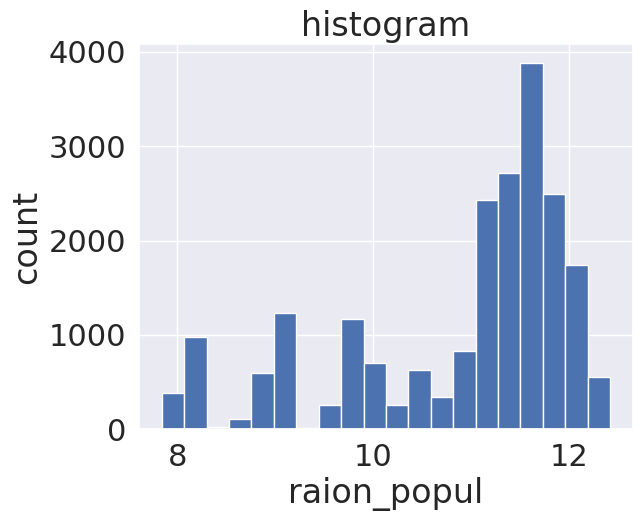

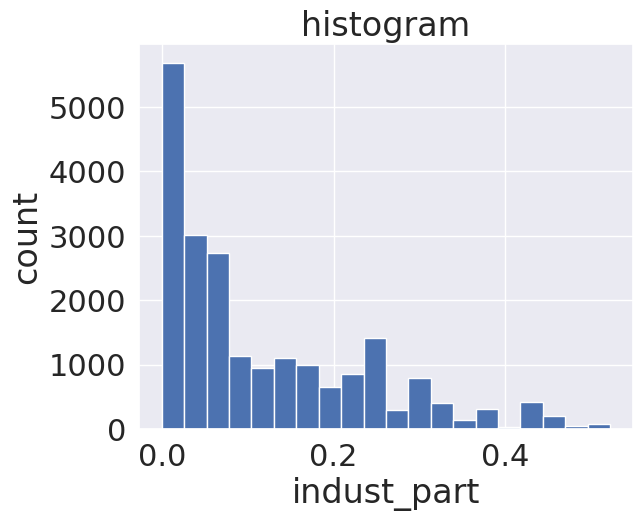

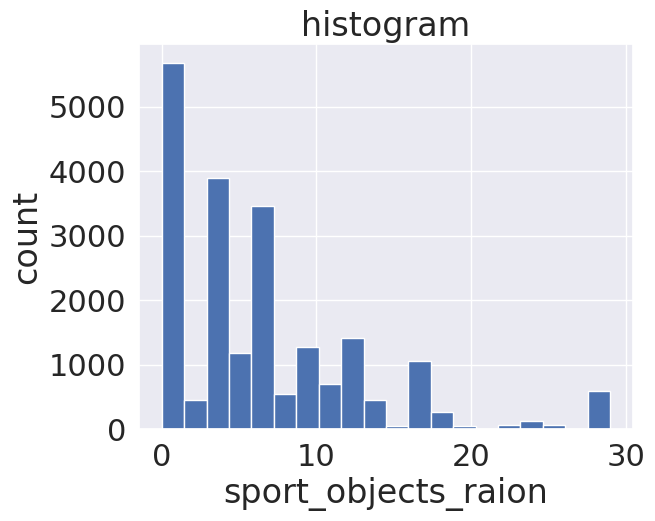

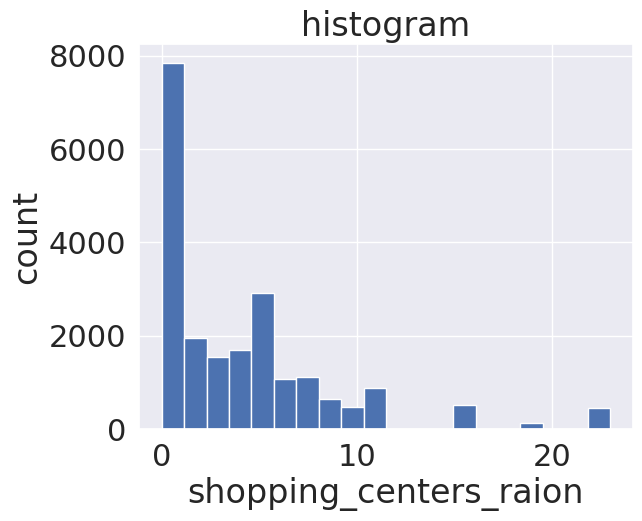

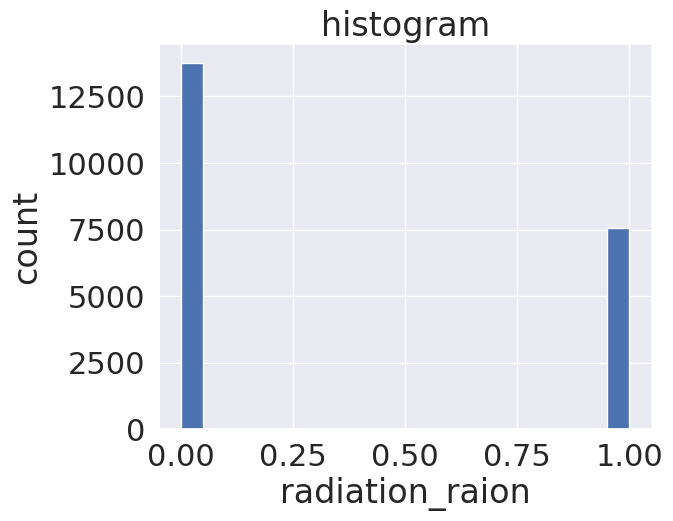

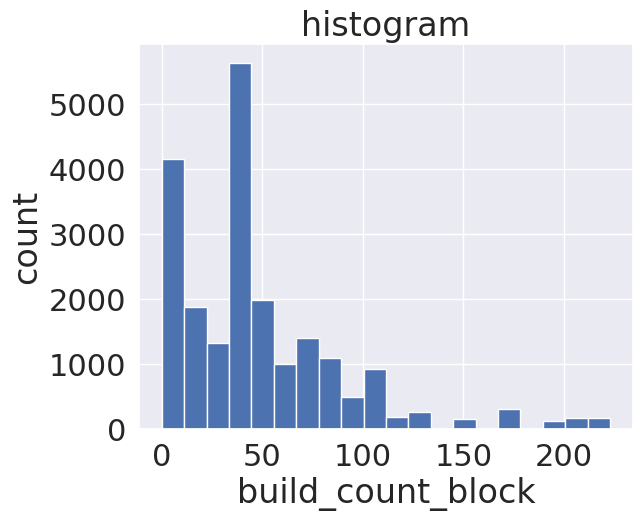

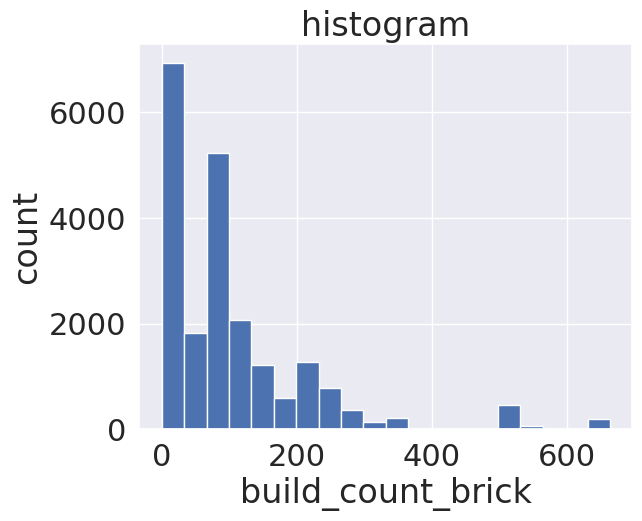

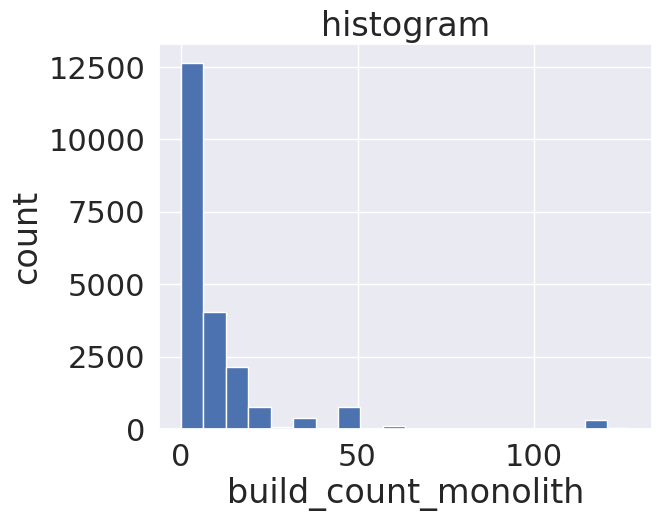

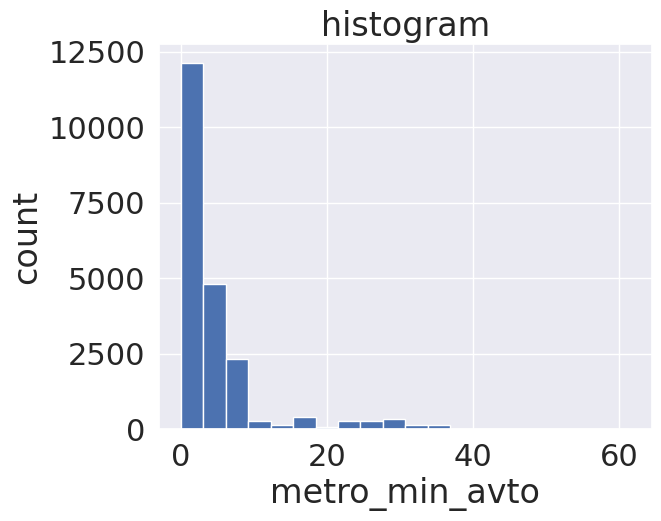

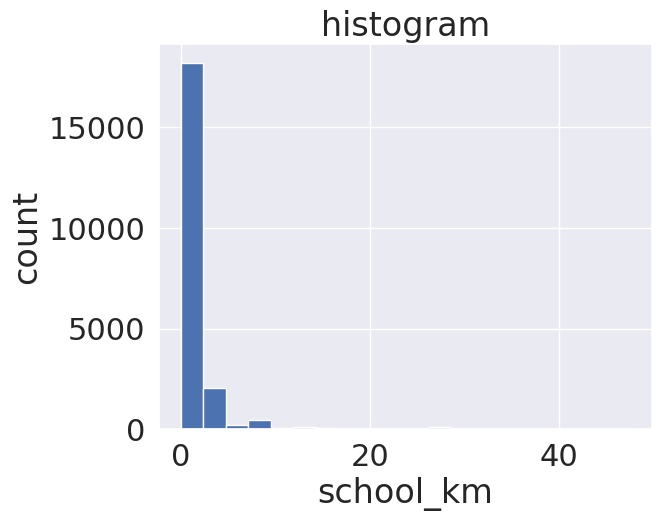

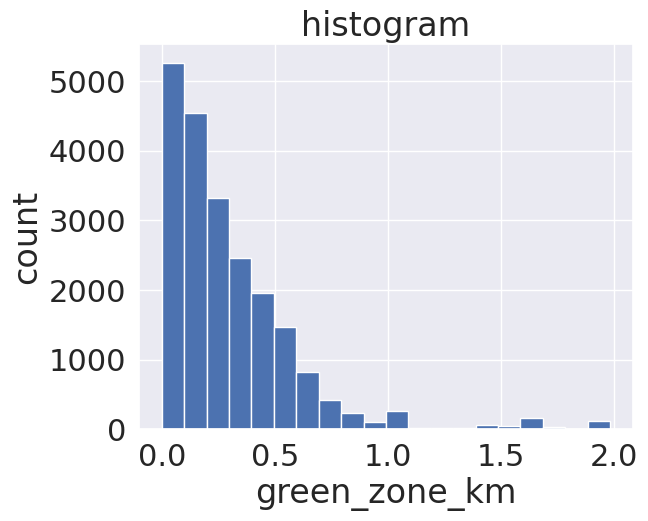

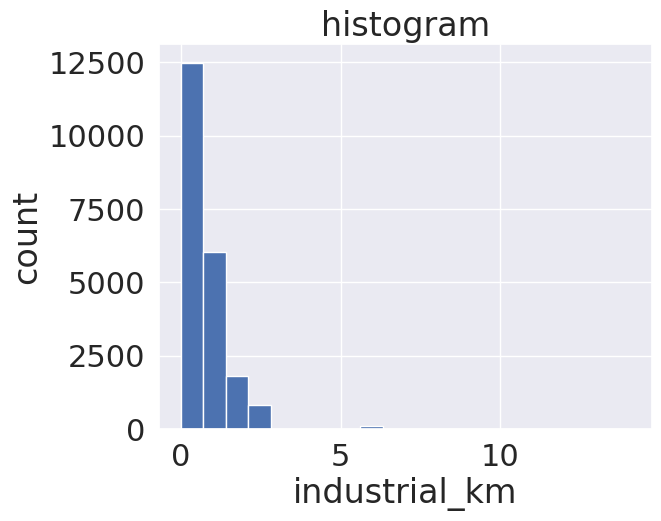

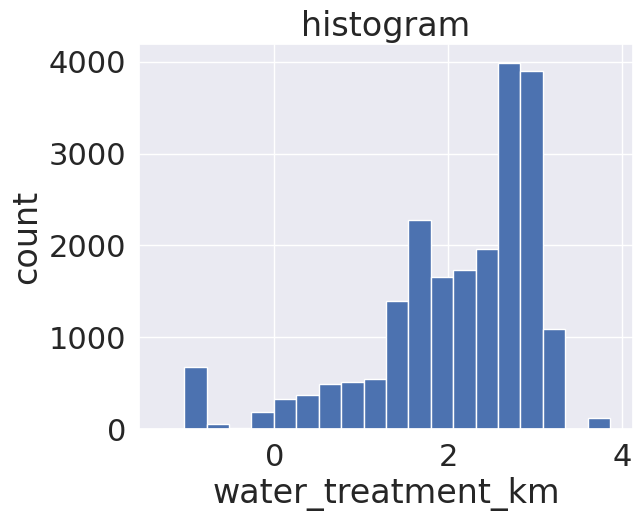

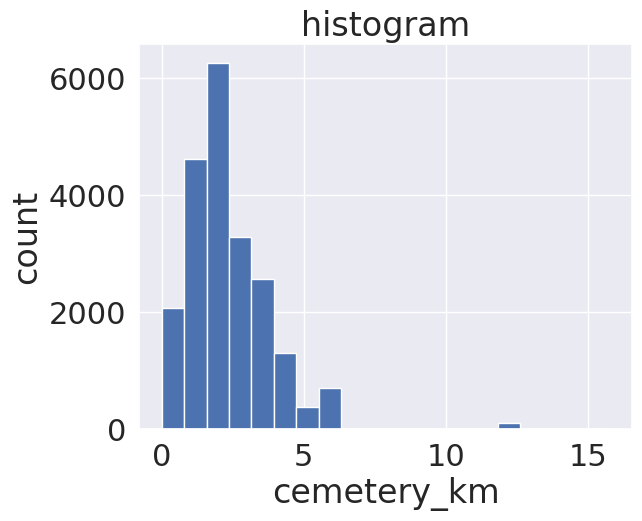

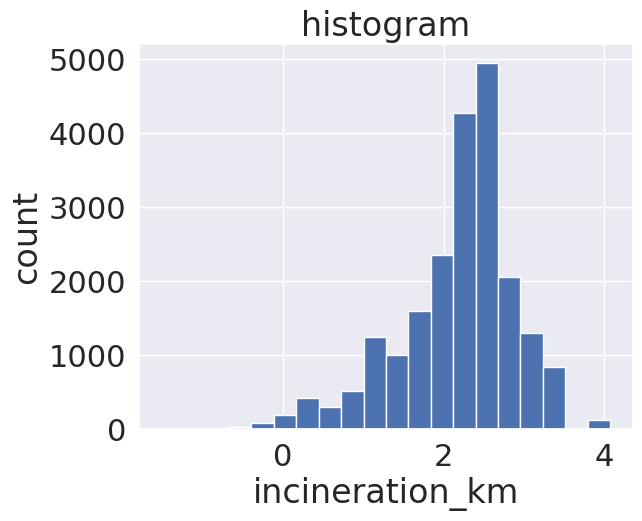

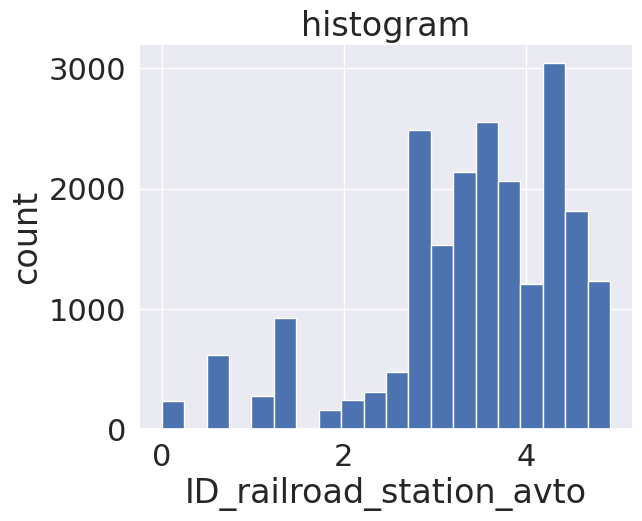

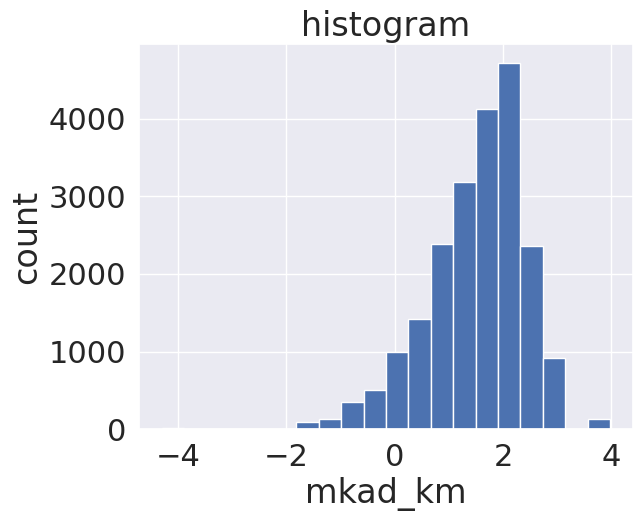

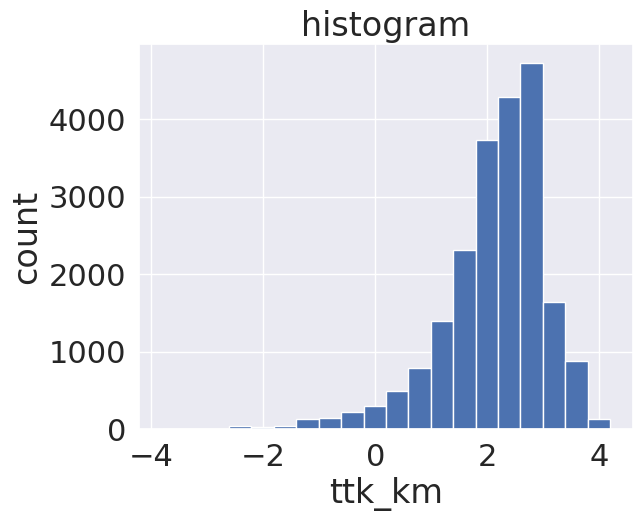

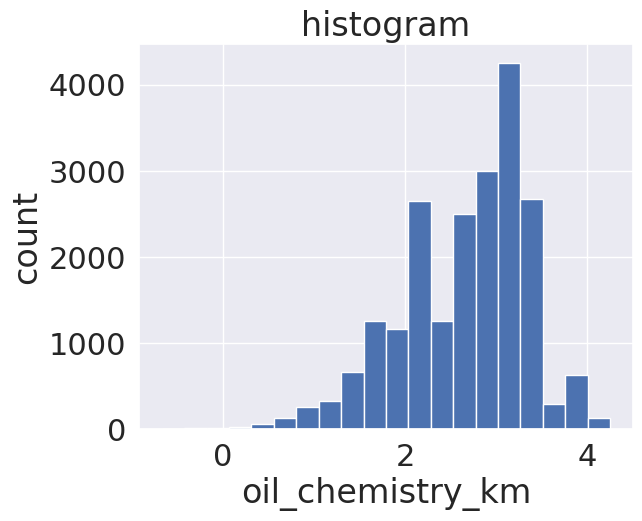

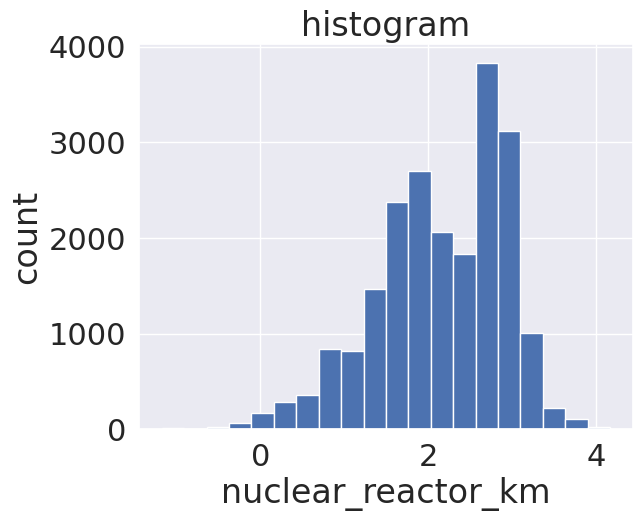

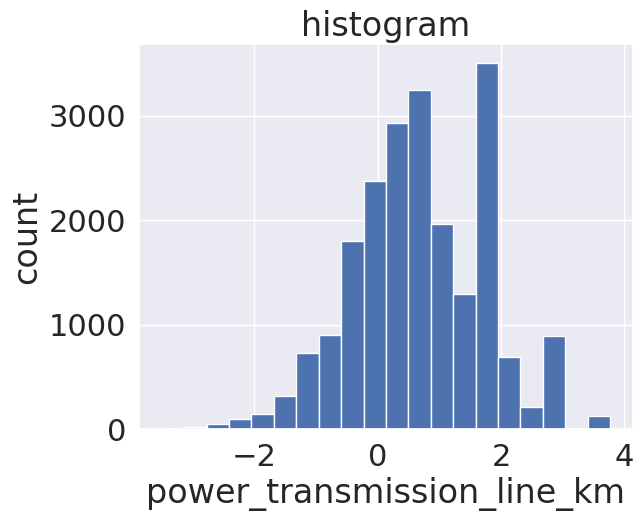

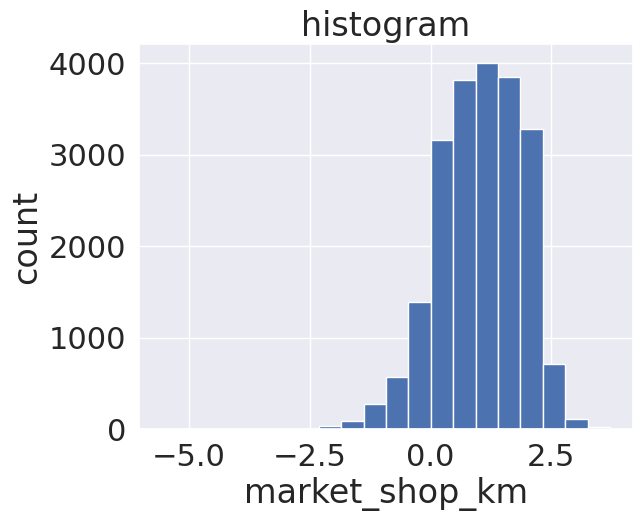

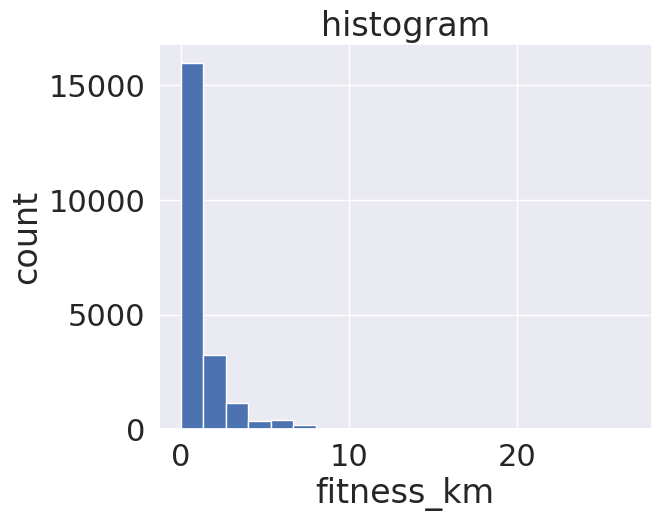

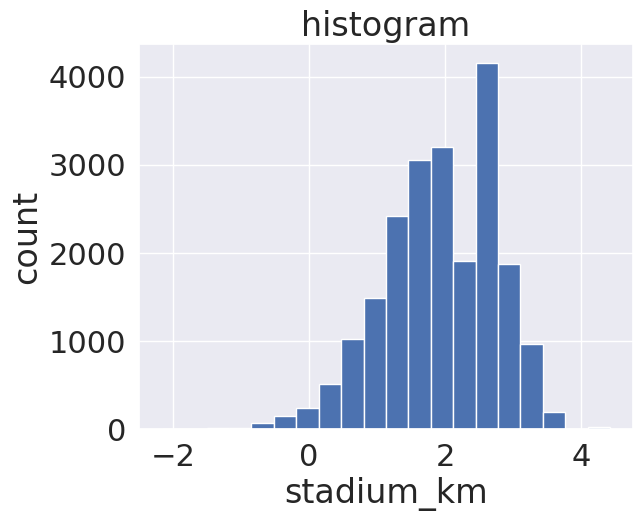

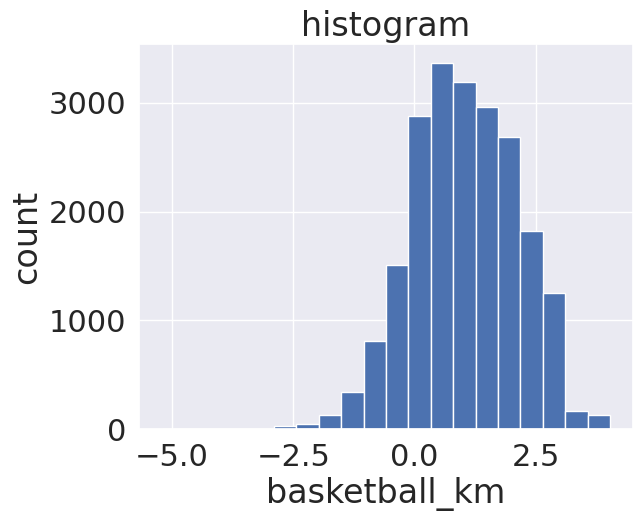

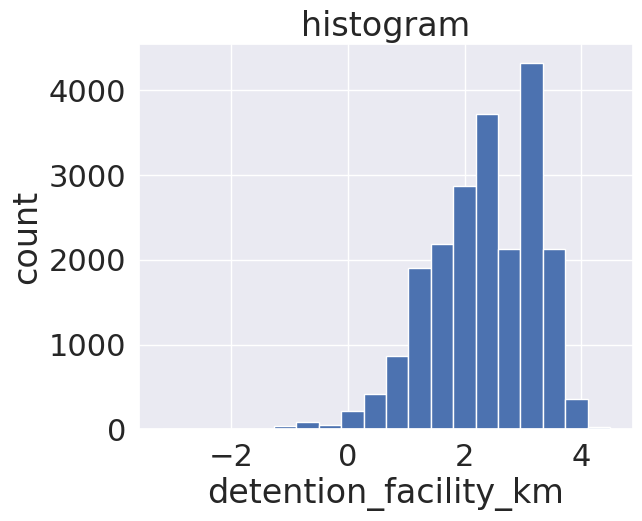

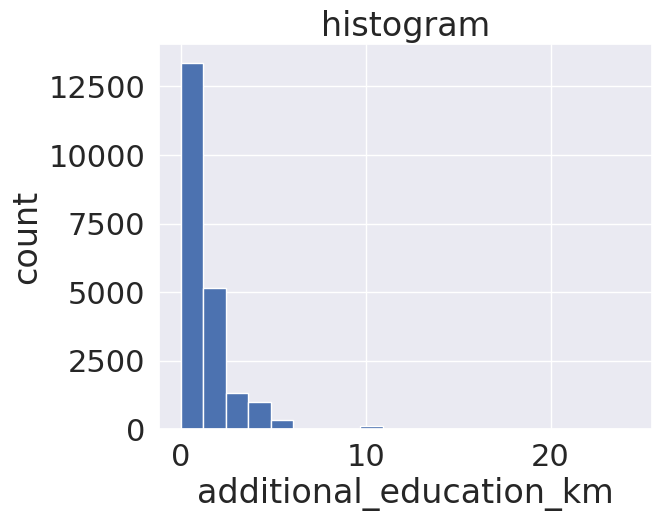

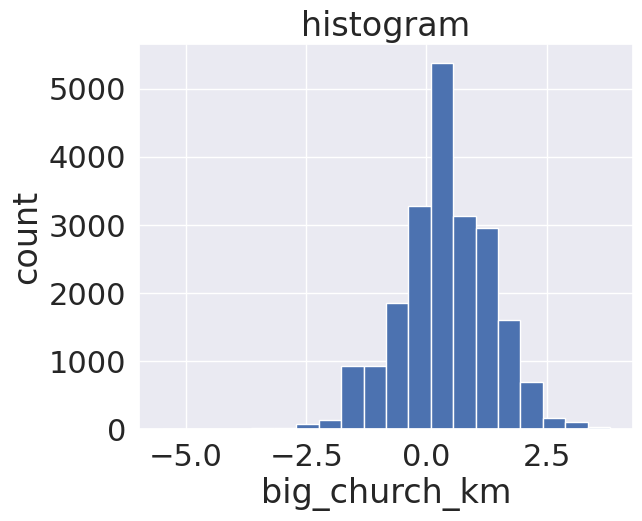

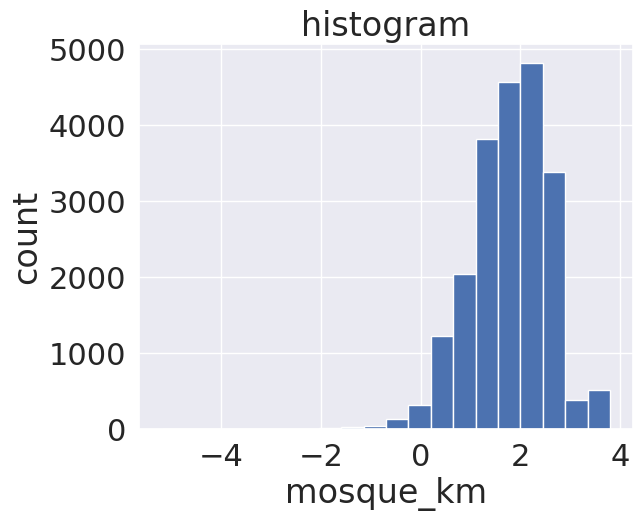

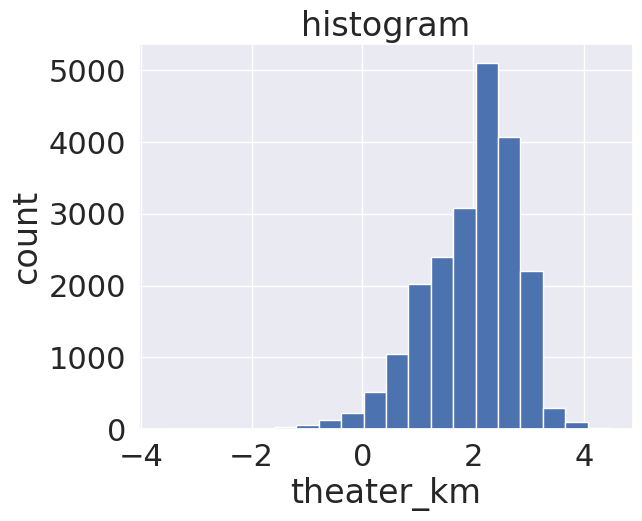

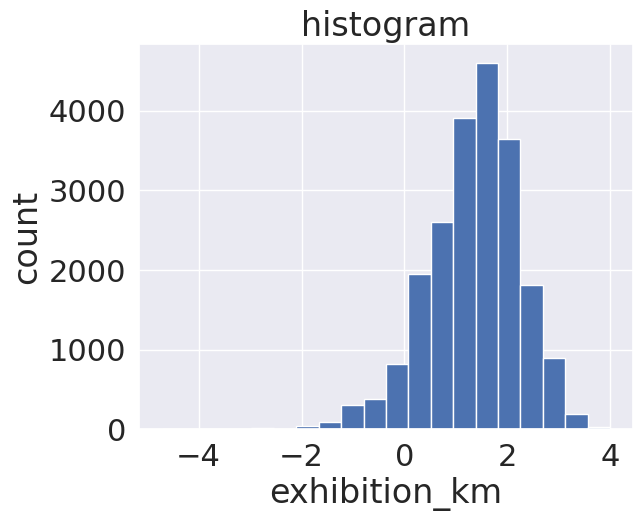

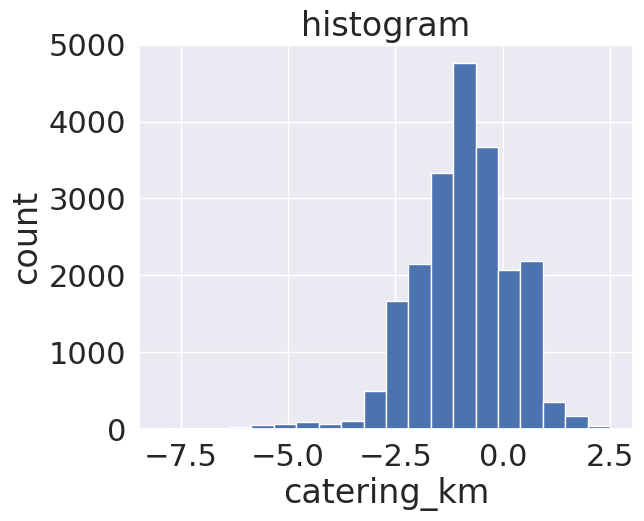

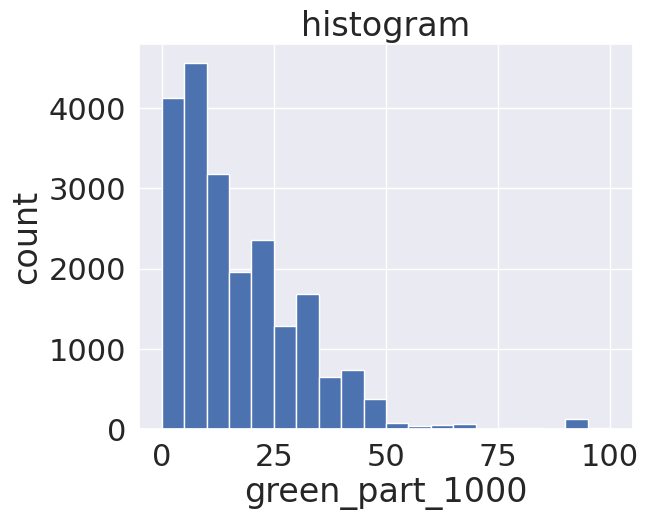

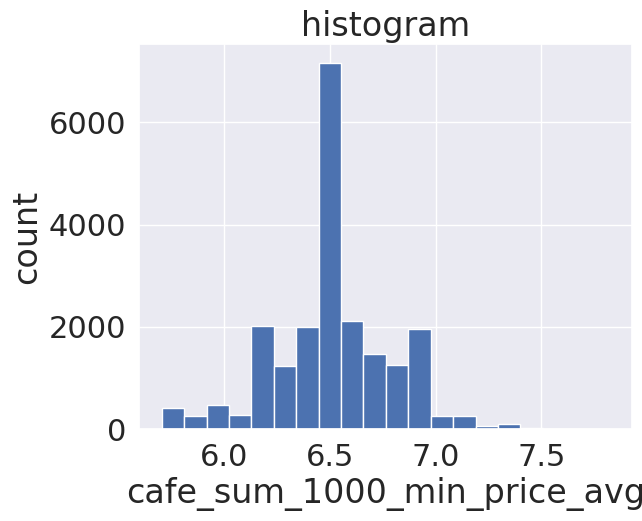

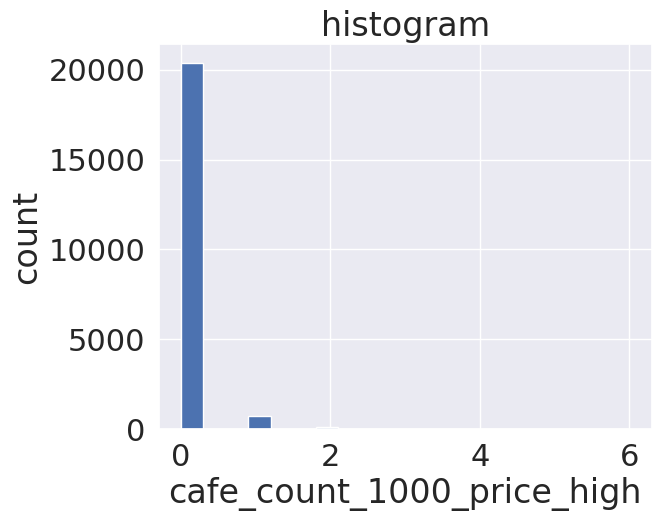

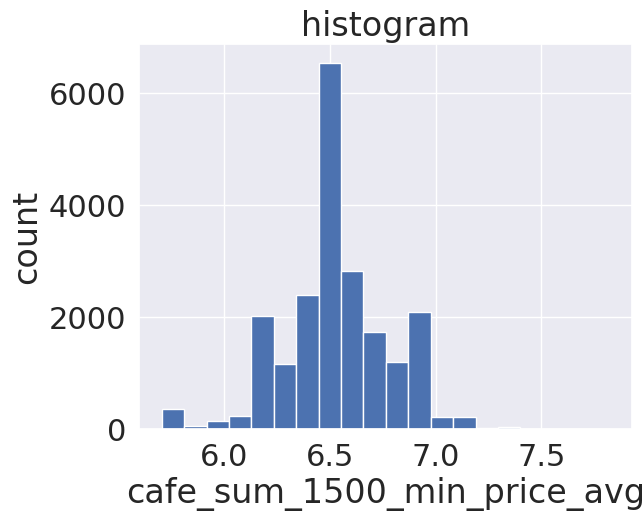

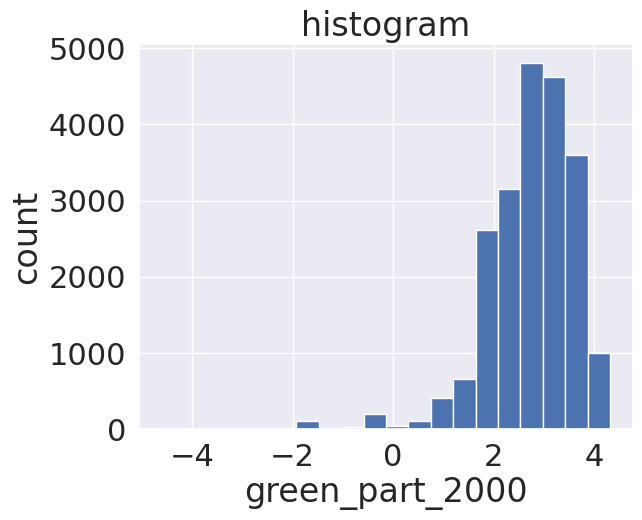

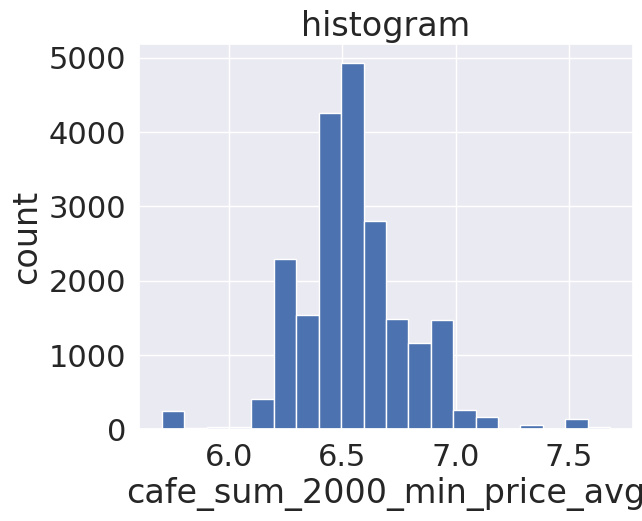

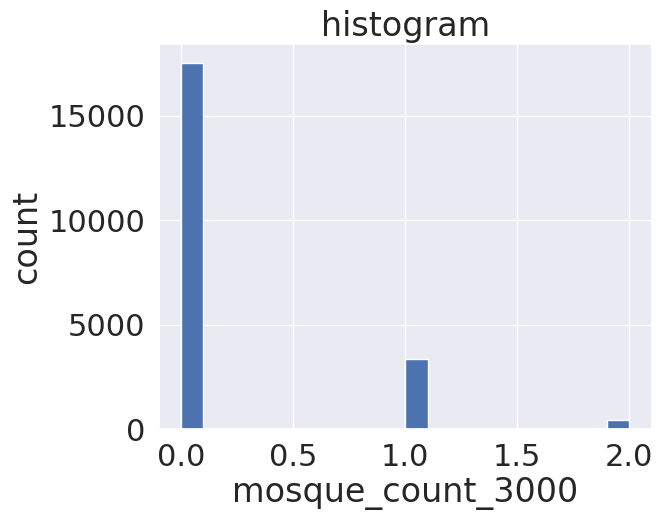

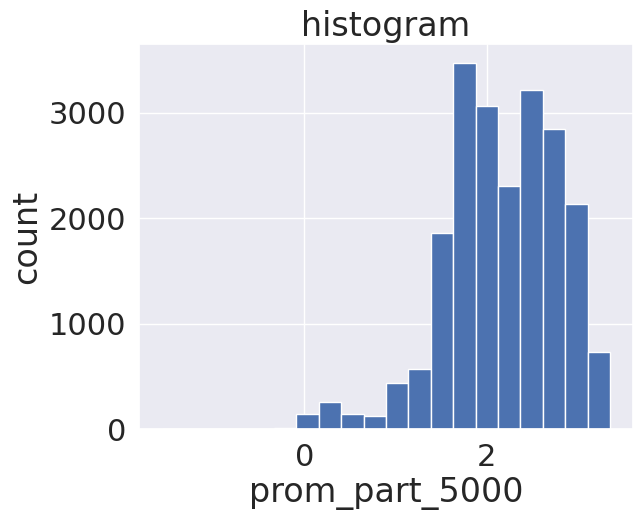

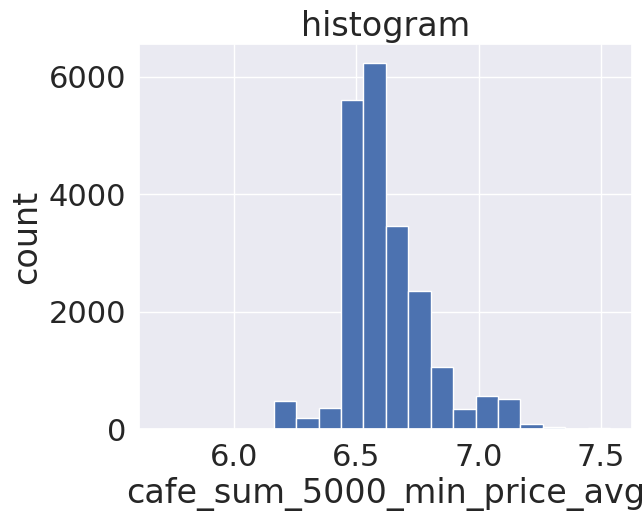

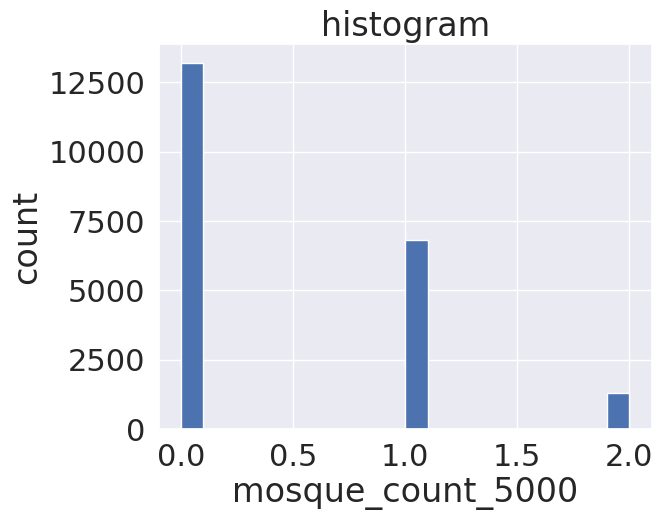

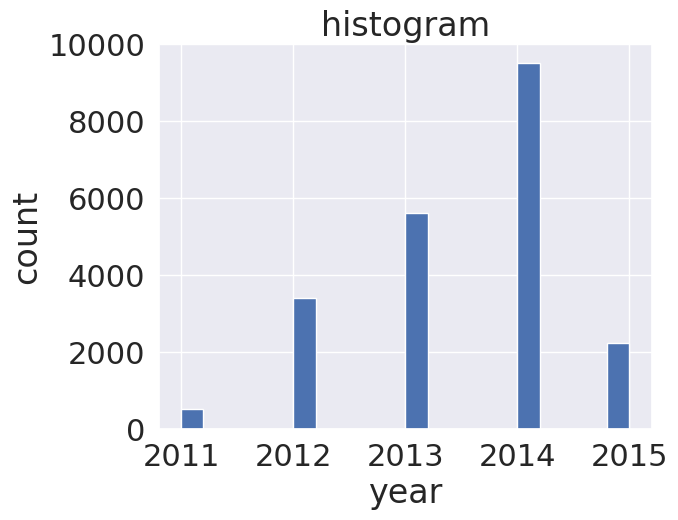

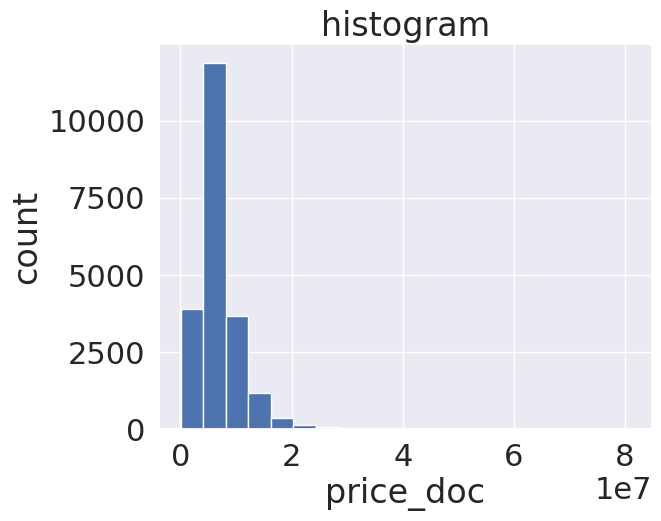

In [101]:
for featers_name in df:
  plt.figure(figsize=(14, 5))

  plt.subplot(121)
  df[featers_name].hist(density=False, bins=20)
  plt.ylabel('count')
  plt.xlabel(featers_name)
  plt.title('histogram')

In [102]:
for featers_name in df:
  plt.plot(df.groupby(featers_name)['price_doc'].mean())
  plt.ylabel('price_doc')
  plt.xlabel(featers_name)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

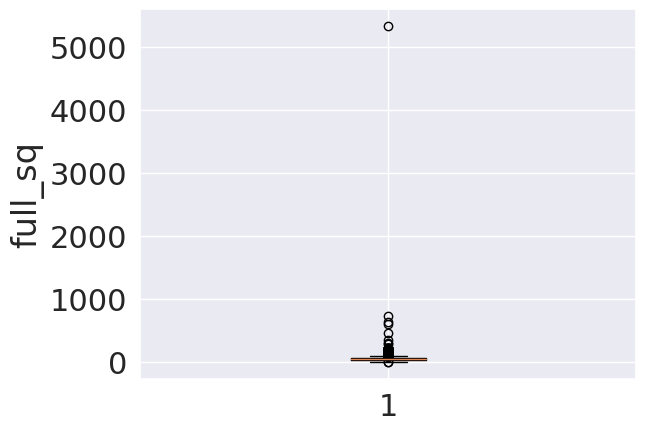

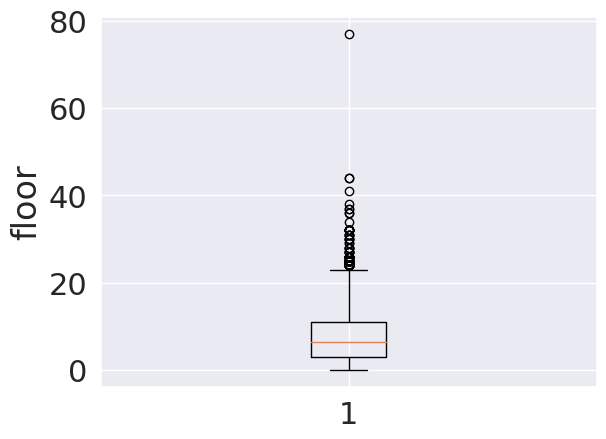

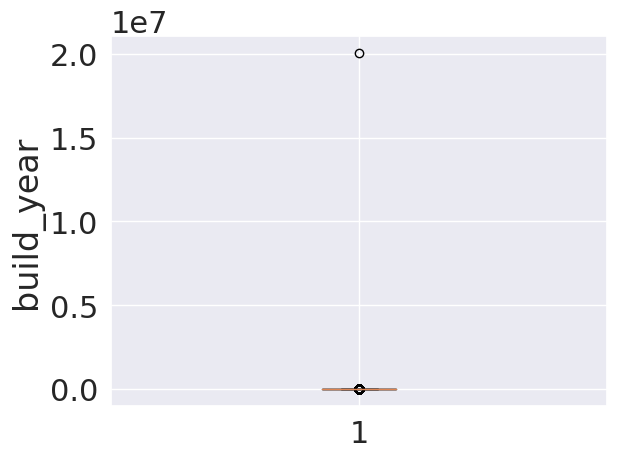

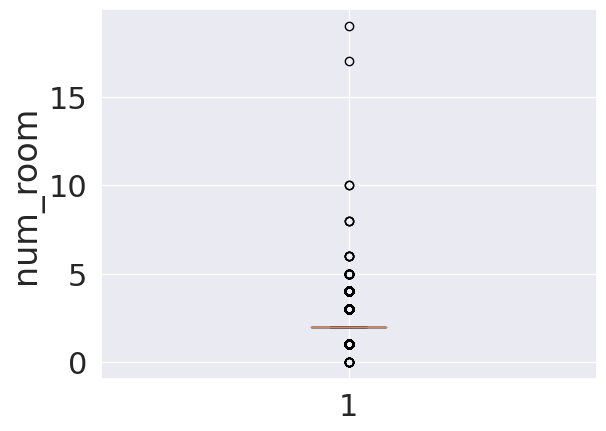

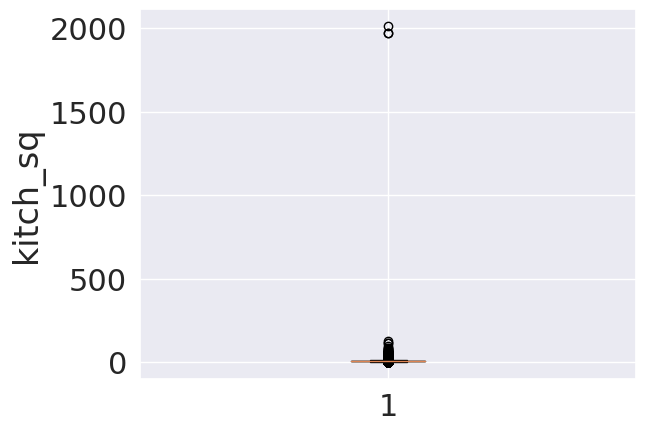

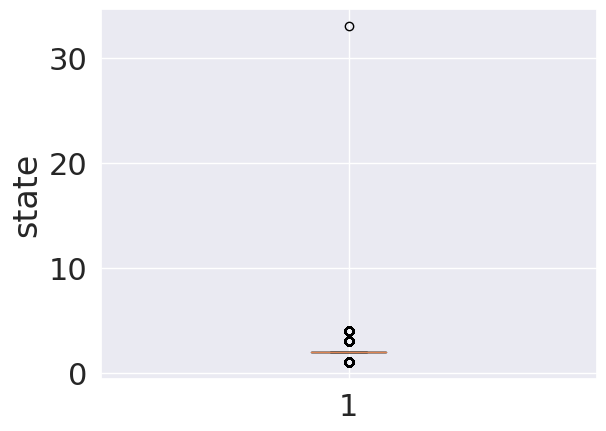

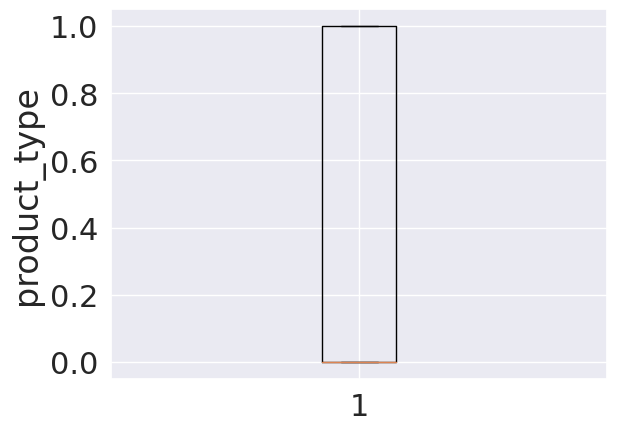

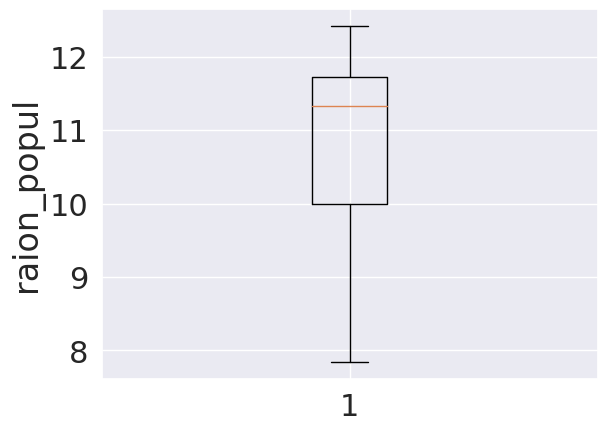

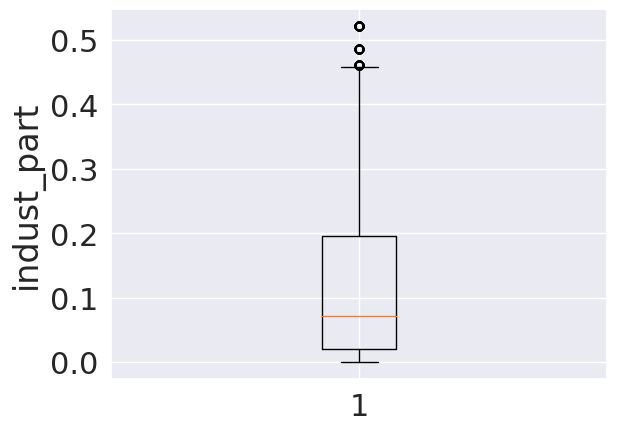

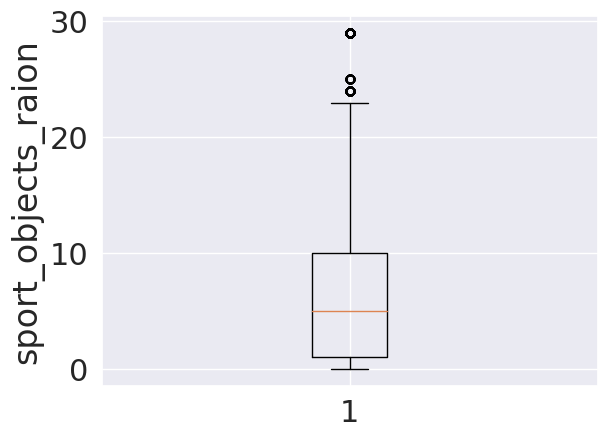

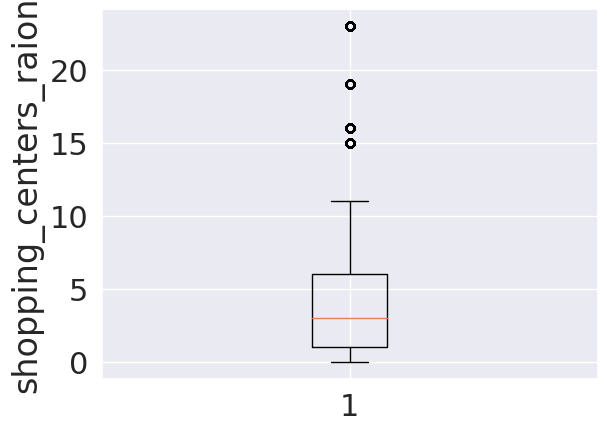

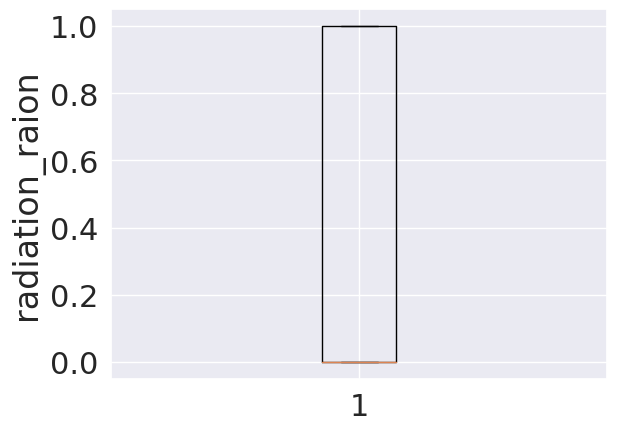

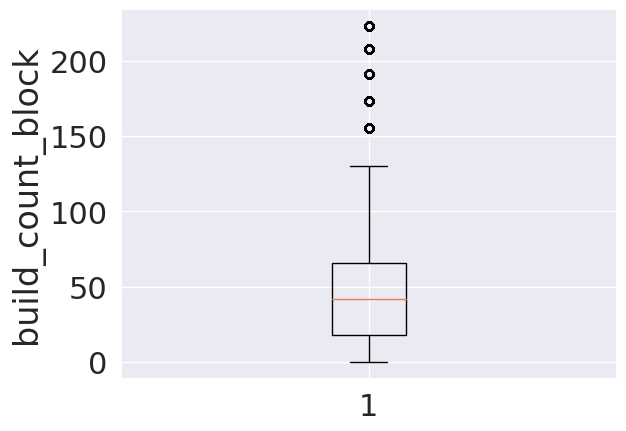

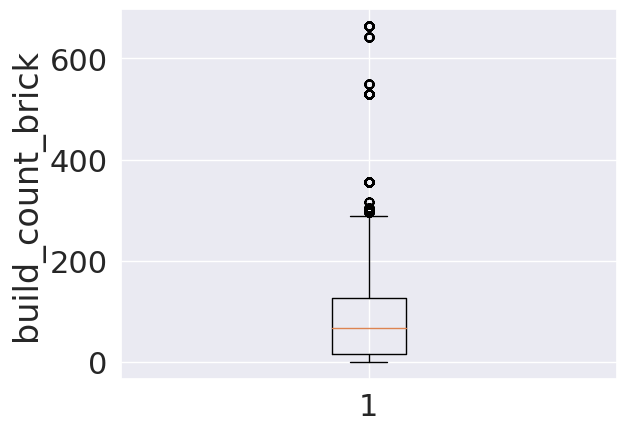

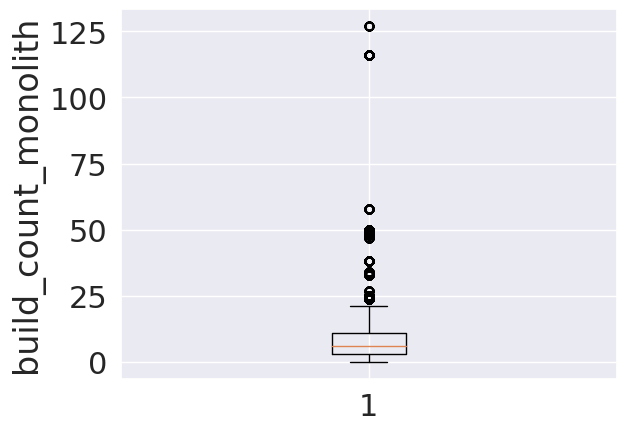

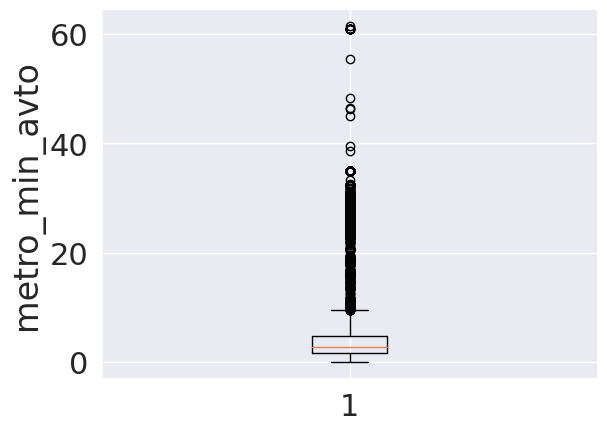

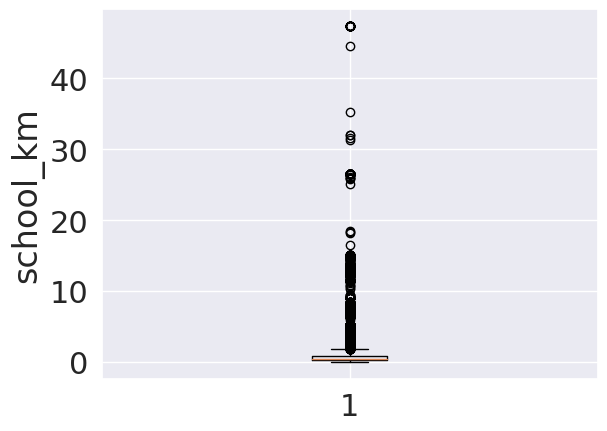

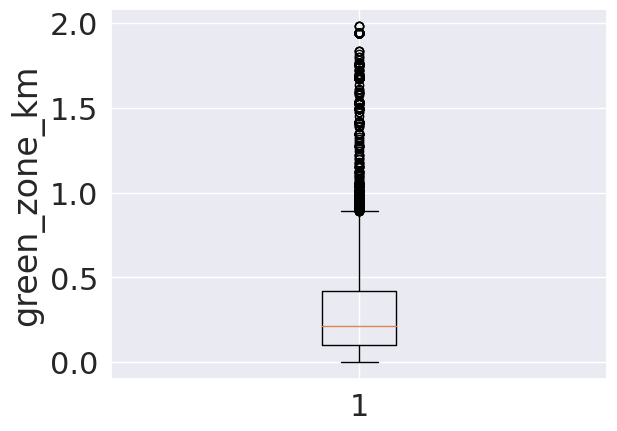

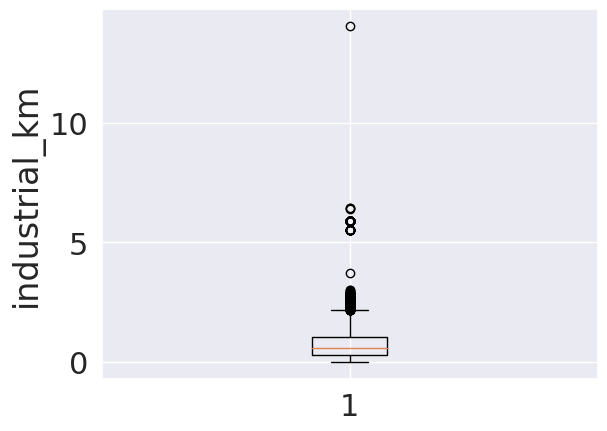

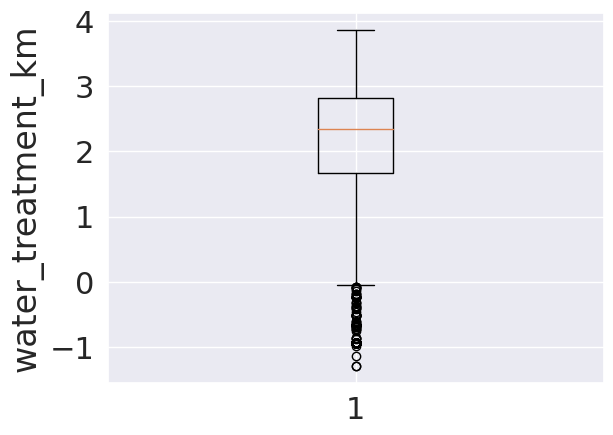

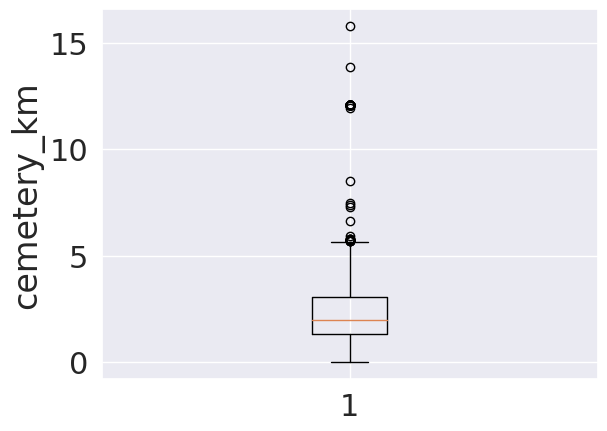

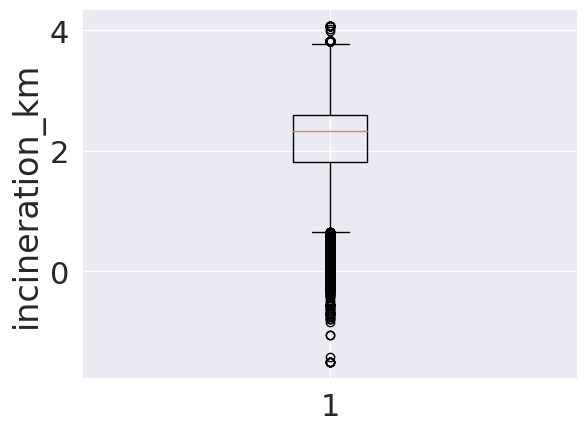

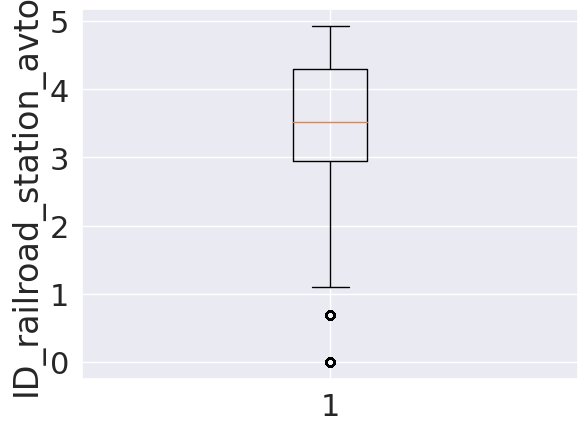

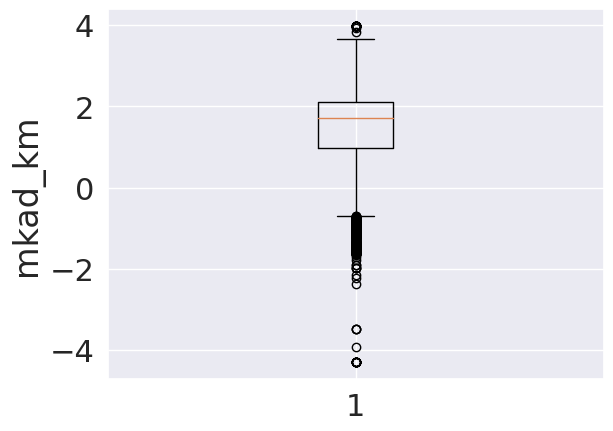

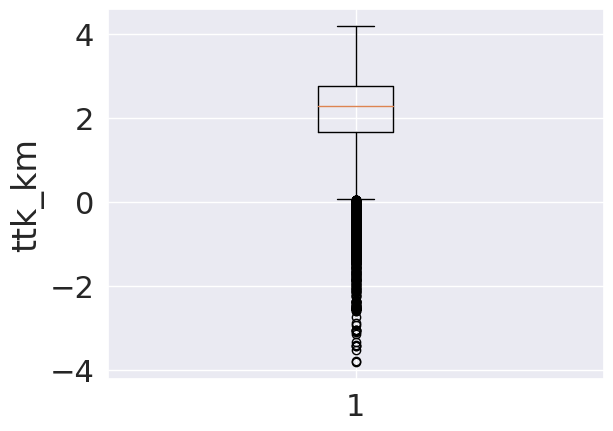

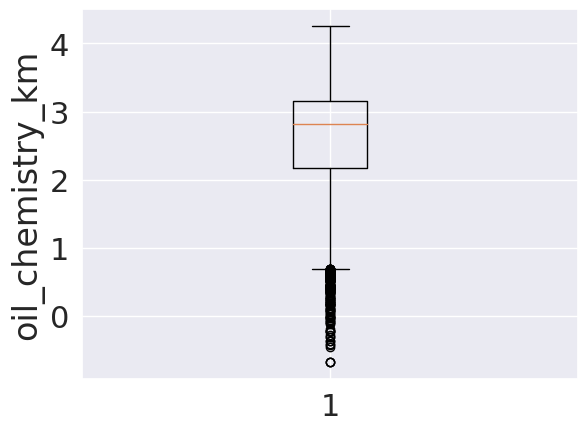

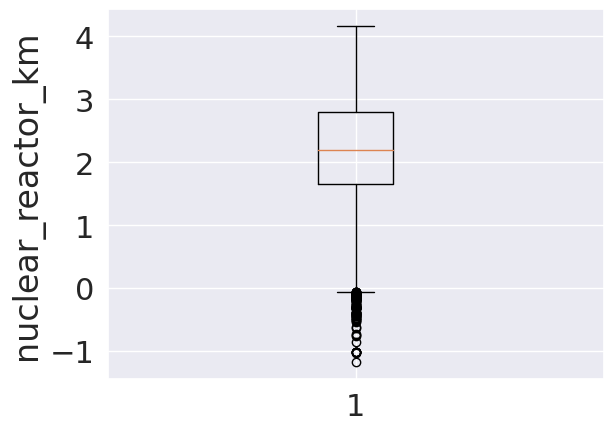

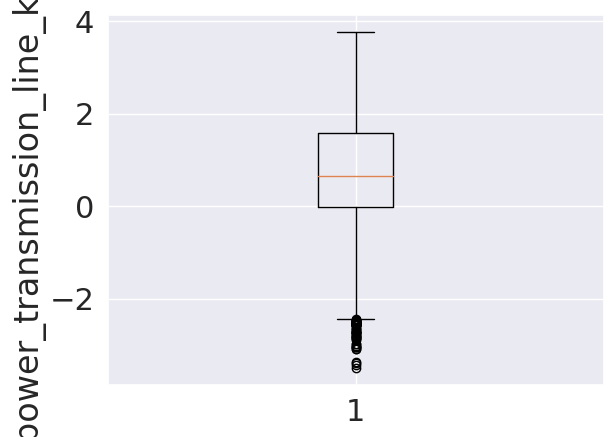

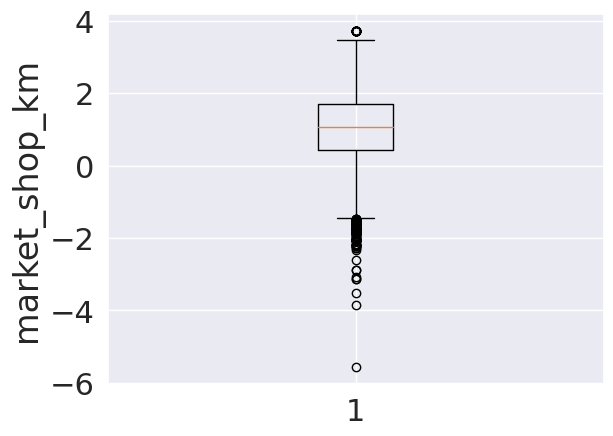

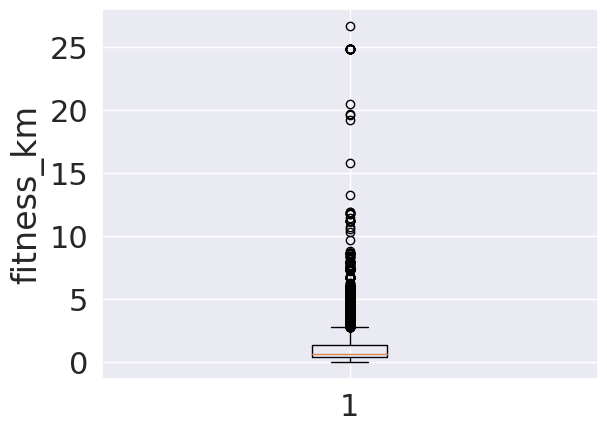

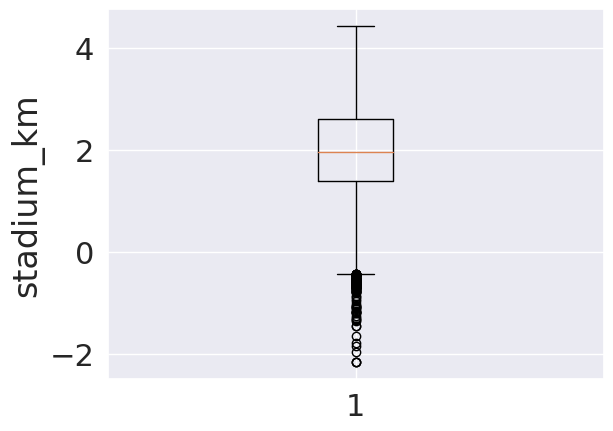

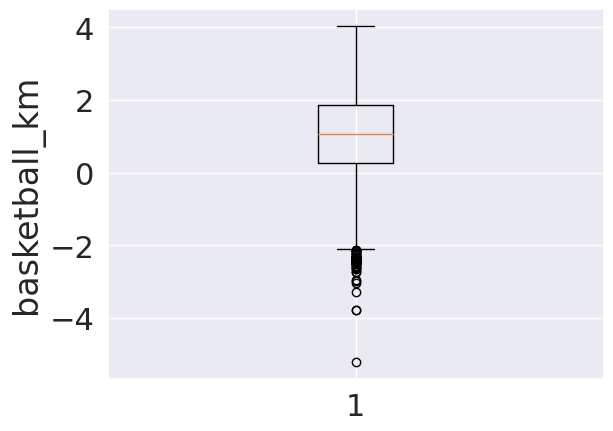

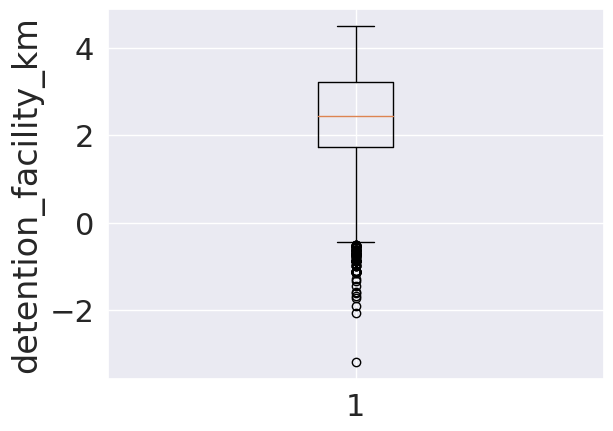

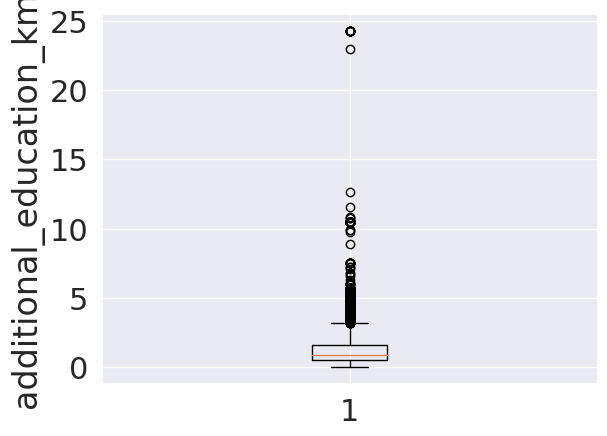

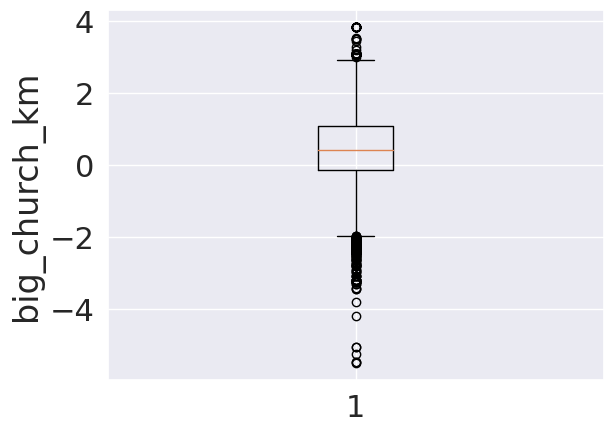

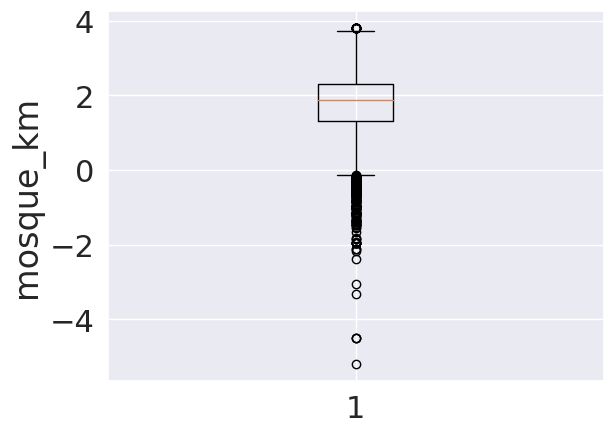

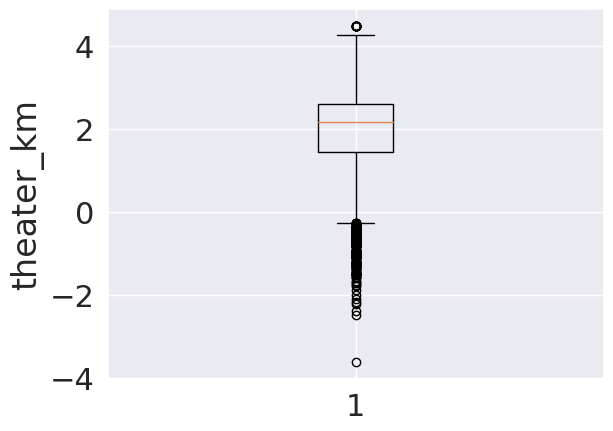

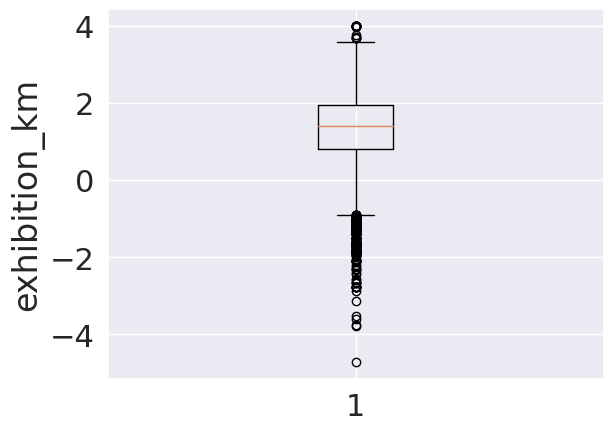

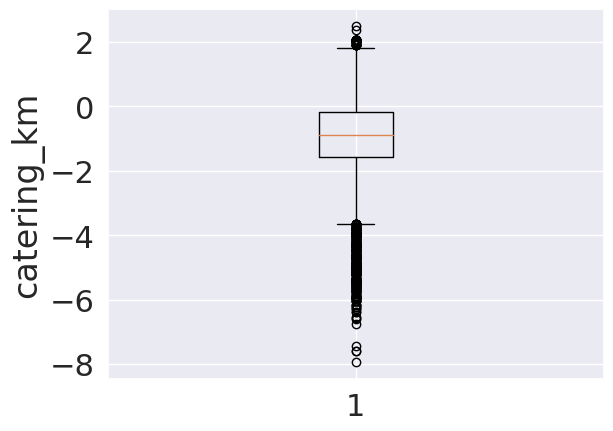

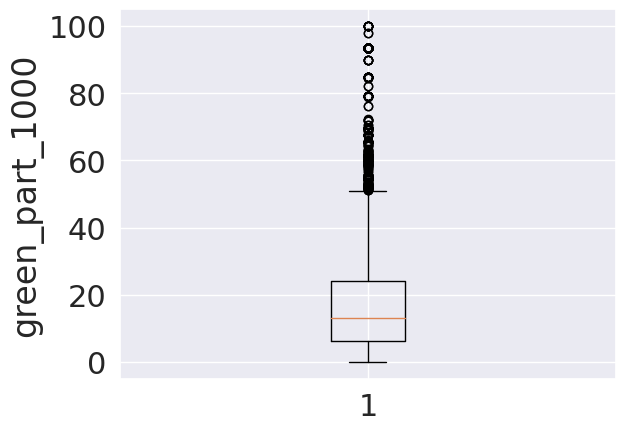

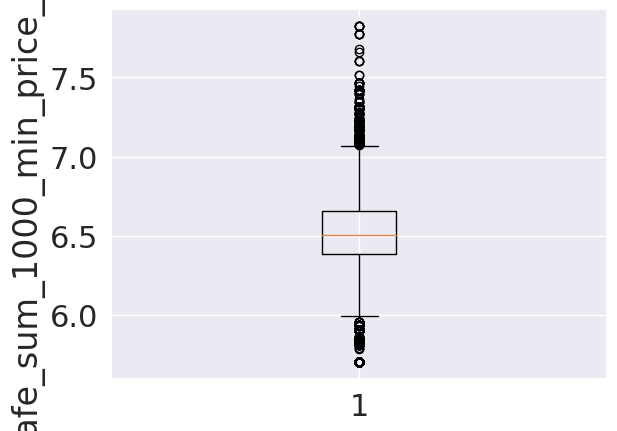

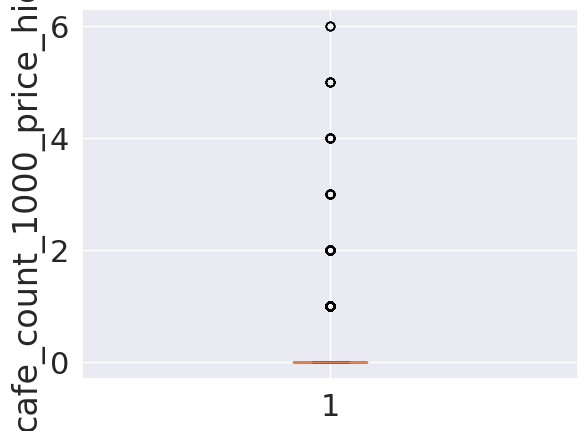

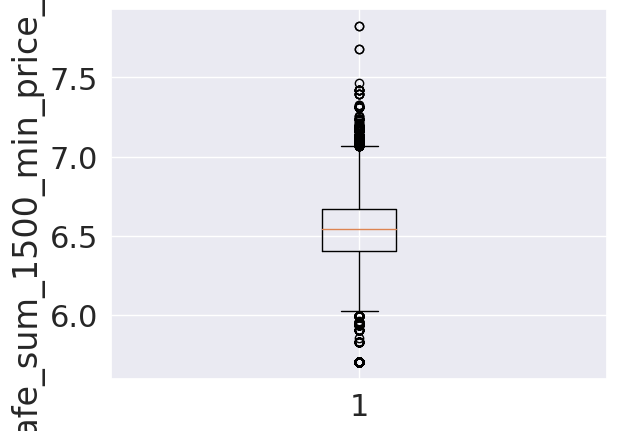

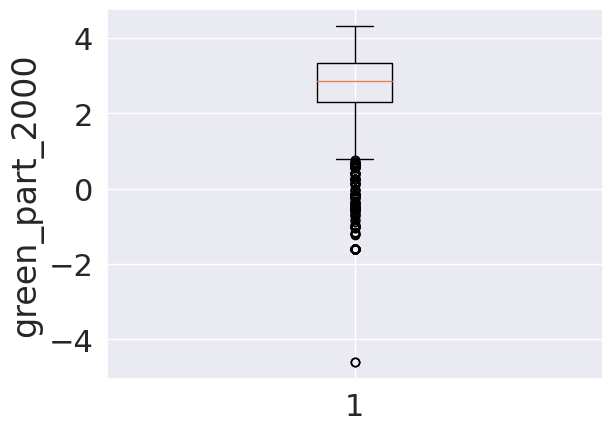

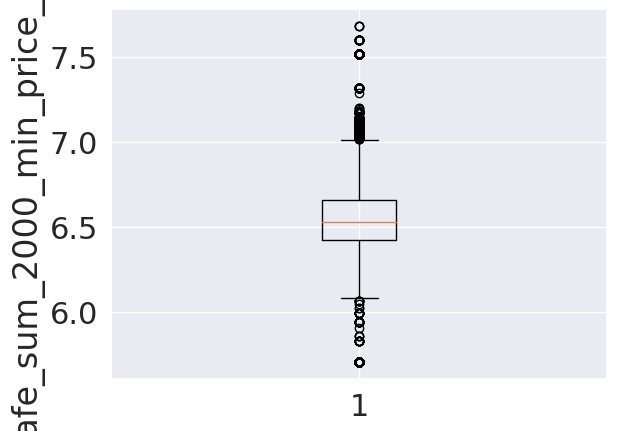

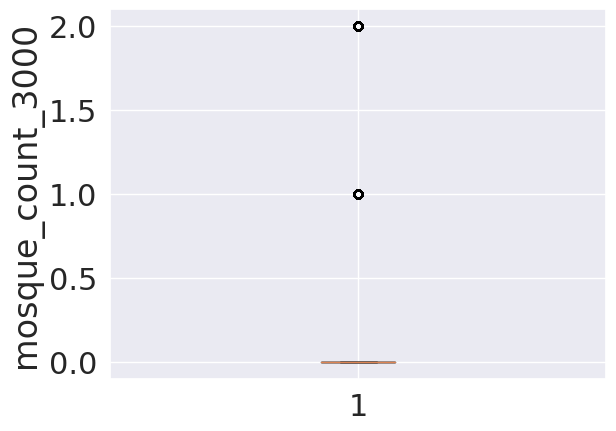

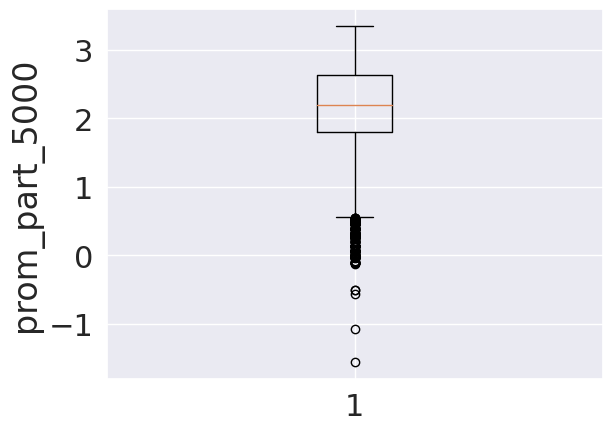

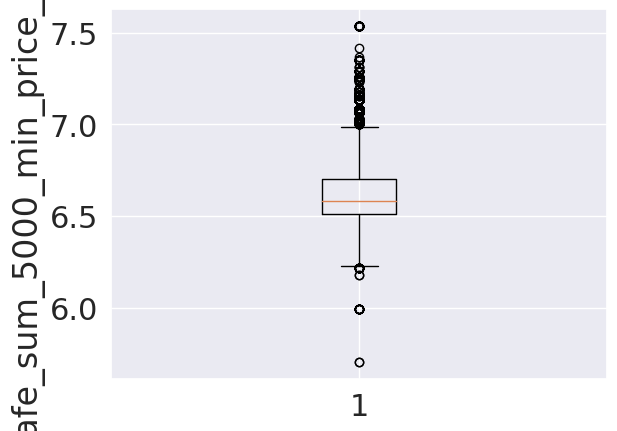

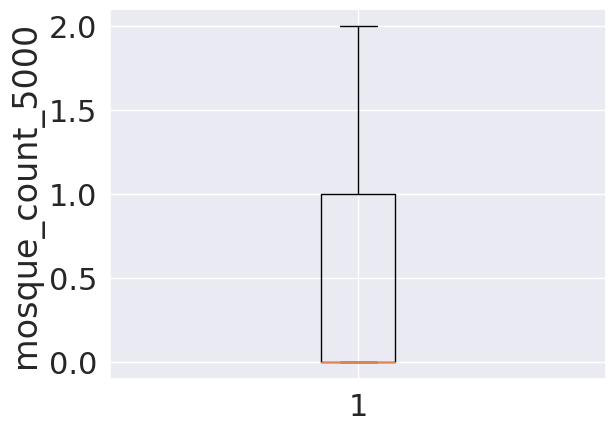

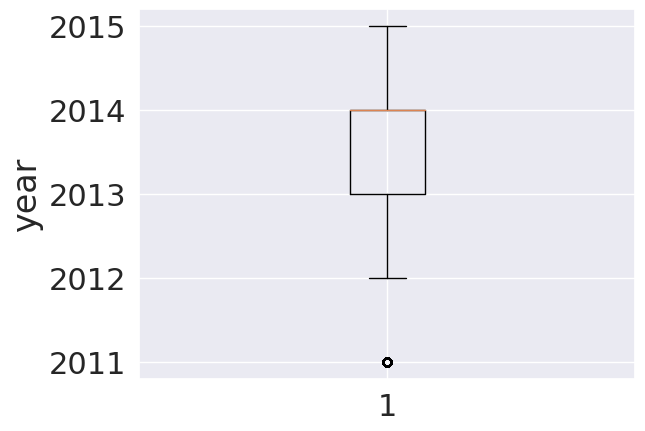

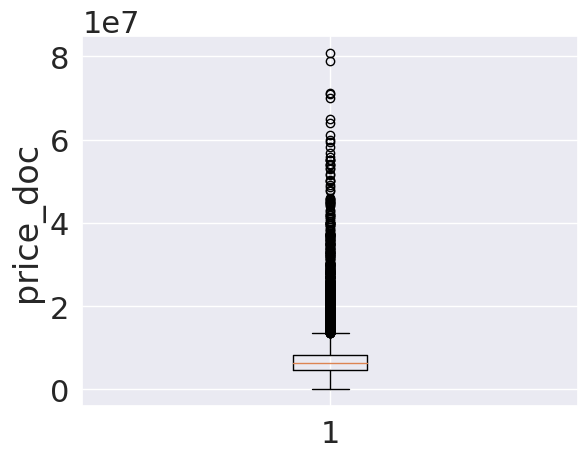

In [103]:
for featers_name in df:
  plt.boxplot(df[featers_name])
  plt.ylabel(featers_name)
  plt.show()

In [104]:
#condition = (df['full_sq']<5)
#df[condition]=df['full_sq'].quantile(0.01)

In [105]:
#condition = (df['kitch_sq']>df['full_sq'])
#df[condition]=df['kitch_sq'].quantile(0.50)

In [106]:
#condition = (df['build_year']>2004)
#df[condition].describe()
#df.loc[condition, 'build_year'] = df['build_year'].median()

In [107]:
#condition = (df['price_doc']>50000000)
#df[condition]

In [108]:
#df = df[df.build_year < 1800]

In [109]:
#df = df[df.build_year <= 2018]
#df = df[df.build_year > 5]

In [110]:
#df = df[df.fitness_km < 10]

In [111]:
#df = df[df.stadium_km < 4]
#df = df[df.stadium_km >=0]

In [112]:
#df = df[df.basketball_km < 4]
#df = df[df.basketball_km >=0]

In [113]:
#condition = (df['nuclear_reactor_km']<0)
#df.loc[condition, 'nuclear_reactor_km'] = df['nuclear_reactor_km'].median()

In [114]:
#condition = (df['oil_chemistry_km']<0)
#df.loc[condition, 'oil_chemistry_km'] = df['oil_chemistry_km'].median()

In [115]:
#condition = (df['ttk_km']<0)
#df.loc[condition, 'ttk_km'] = df['ttk_km'].median()

In [116]:
#condition = (df['kitch_sq']>1000) | (df['kitch_sq']<1)
#df[condition].describe()

## Добавление новых фичей

In [117]:
#df = df.assign(sq_room = df.num_room/df.full_sq)

In [118]:
#df['cafe_count_1000_price_high_log2']=np.log2(df['cafe_count_1000_price_high'])
#df.drop(columns='cafe_count_1000_price_high',inplace=True)

## Ниже добавление фичей которые также ухудшали результаты модели

In [119]:
#df['stadium_closely'] = 0
#df.loc[abs(df.stadium_km) <= 2.2,'stadium_closely']=1
#df['stadium_closely'].value_counts()
#df = df[df.stadium_km >=0]

In [120]:
#df['stadium_mean'] = 0
#df.loc[(abs(df.stadium_km) > 2.2) & (abs(df.stadium_km) <= 2.8),'stadium_mean']=1

In [121]:
#df['stadium_far'] = 0
#df.loc[abs(df.stadium_km) > 2.8,'stadium_far']=1

In [122]:
#df['stadium_closely'] = 0
#df.loc[abs(df.stadium_km) <= 2.2,'stadium_closely']=1
#df.loc[(abs(df.stadium_km) > 2.2) & (abs(df.stadium_km) <= 3.8),'stadium_closely']=2
#df.loc[abs(df.stadium_km) > 3.8,'stadium_closely']=3

In [123]:
#plt.plot(df.groupby('stadium_far')['price_doc'].mean())
##plt.ylabel('price_doc')
#plt.xlabel('stadium_far')
#plt.show()

In [124]:
#plt.plot(df.groupby('price_doc')['stadium_mean'].mean())
#plt.ylabel('price_doc')
#plt.xlabel('stadium_mean')
#plt.show()

In [125]:
#plt.plot(df.groupby('stadium_closely')['price_doc'].mean())
#plt.ylabel('price_doc')
#plt.xlabel('stadium_closely')
#plt.show()

In [126]:
#df_mb=df[['stadium_closely','price_doc']]

In [127]:
"""temp=0
for i in range(0,41):
  for j in range(0,41):
    df_mb['stadium_closely'] = 0
    df_mb.loc[abs(df.stadium_km) <= i/10,'stadium_closely']=1
    df.loc[(abs(df.stadium_km) > i/10) & (abs(df.stadium_km) <= i/10+j/10),'stadium_closely']=2
    df_mb.loc[(abs(df.stadium_km) > i/10+j/10),'stadium_closely']=3
    corr_matrix = df_mb.corr()
    if(temp<abs(corr_matrix['price_doc']).sum()):
      temp=abs(corr_matrix['price_doc']).sum()
      print(abs(corr_matrix['price_doc']).sum())
      print(i/10,i/10+j/10)
      print()"""

"temp=0\nfor i in range(0,41):\n  for j in range(0,41):\n    df_mb['stadium_closely'] = 0\n    df_mb.loc[abs(df.stadium_km) <= i/10,'stadium_closely']=1\n    df.loc[(abs(df.stadium_km) > i/10) & (abs(df.stadium_km) <= i/10+j/10),'stadium_closely']=2\n    df_mb.loc[(abs(df.stadium_km) > i/10+j/10),'stadium_closely']=3\n    corr_matrix = df_mb.corr()\n    if(temp<abs(corr_matrix['price_doc']).sum()):\n      temp=abs(corr_matrix['price_doc']).sum()\n      print(abs(corr_matrix['price_doc']).sum())\n      print(i/10,i/10+j/10)\n      print()"

In [128]:
#df['fitness_closely'] = 0
#df.loc[abs(df.fitness_km) <= 2.2,'fitness_closely']=1
#df['fitness_far'] = 0
#df.loc[abs(df.fitness_km) > 4.3,'fitness_far']=1

In [129]:
#df=df[['fitness_closely','fitness_med','fitness_far','price_doc']]

In [130]:
"""temp=0
for i in range(0,101):
  for j in range(0,101):
    df_mb['fitness_closely'] = 0
    df_mb.loc[abs(df.fitness_km) <= i/10,'fitness_closely']=1
    df_mb['fitness_med'] = 0
    df_mb.loc[(abs(df.stadium_km) > i/10) & (abs(df.stadium_km) <= i/10+j/10),'fitness_med']=1
    df['fitness_far'] = 0
    df_mb.loc[(abs(df.fitness_km) > i/10+j/10),'fitness_far']=1
    corr_matrix = df_mb.corr()
    if(temp<abs(corr_matrix['price_doc']).sum()):
      temp=abs(corr_matrix['price_doc']).sum()
      print(abs(corr_matrix['price_doc']).sum())
      print(i/10,i/10+j/10)
      print()"""

"temp=0\nfor i in range(0,101):\n  for j in range(0,101):\n    df_mb['fitness_closely'] = 0\n    df_mb.loc[abs(df.fitness_km) <= i/10,'fitness_closely']=1\n    df_mb['fitness_med'] = 0\n    df_mb.loc[(abs(df.stadium_km) > i/10) & (abs(df.stadium_km) <= i/10+j/10),'fitness_med']=1\n    df['fitness_far'] = 0\n    df_mb.loc[(abs(df.fitness_km) > i/10+j/10),'fitness_far']=1\n    corr_matrix = df_mb.corr()\n    if(temp<abs(corr_matrix['price_doc']).sum()):\n      temp=abs(corr_matrix['price_doc']).sum()\n      print(abs(corr_matrix['price_doc']).sum())\n      print(i/10,i/10+j/10)\n      print()"

In [131]:
#plt.plot(df.groupby('fitness_closely')['price_doc'].mean())
#plt.ylabel('price_doc')
#plt.xlabel('fitness_closely')
#plt.show()

In [132]:
#df.drop(columns='age', inplace=True)

In [133]:
"""plt.figure(figsize = (70,30))

sns.set(font_scale=2)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix)<0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()"""

"plt.figure(figsize = (70,30))\n\nsns.set(font_scale=2)\n\ncorr_matrix = df.corr()\ncorr_matrix = np.round(corr_matrix, 2)\ncorr_matrix[np.abs(corr_matrix)<0.1] = 0\n\nsns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')\n\nplt.title('Correlation matrix')\nplt.show()"

In [134]:
#df = df.assign(F3 = df.num_room/(df.full_sq - df.kitch_sq))

In [135]:
#df = df.assign(F2 = (df.full_sq - df.kitch_sq)/df.num_room)

In [136]:
#df.drop(columns='year', inplace=True)

In [137]:
#df.drop(columns='mosque_count_3000', inplace=True)
#df.drop(columns='mosque_count_5000', inplace=True)

In [138]:
#df = df.assign(F2 = df.oil_chemistry_km + df.nuclear_reactor_km + df.stadium_km + df.basketball_km+ df.theater_km+df.exhibition_km+df.ttk_km)

In [139]:
#df.drop(columns='oil_chemistry_km', inplace=True)
#df.drop(columns='nuclear_reactor_km', inplace=True)
#df.drop(columns='stadium_km', inplace=True)
#df.drop(columns='basketball_km', inplace=True)
#df.drop(columns='theater_km', inplace=True)
#df.drop(columns='exhibition_km', inplace=True)
#df.drop(columns='ttk_km', inplace=True)

In [140]:
#df = df.assign(F = df.school_km + df.fitness_km + df.additional_education_km)

In [141]:
#df.drop(columns='incineration_km', inplace=True)

In [142]:
#df.drop(columns='F', inplace=True)

In [143]:
#df.drop(columns='fitness_med', inplace=True)

In [144]:
#df = df.assign(F = df.basketball_km + df.fitness_km + df.stadium_km)

In [145]:
#df.drop(columns='fitness_km', inplace=True)
#df.drop(columns='school_km', inplace=True)
#df.drop(columns='additional_education_km', inplace=True)

In [146]:
#df = df.assign(room_sq = df.full_sq/df.num_room)

In [147]:
#df = df.assign(age = df.year-df.build_year)

In [148]:
#df['fitness_km'].hist(density=False, bins=20)

In [149]:
#plt.plot(df.groupby('stadium_km')['price_doc'].mean())
#plt.show()

## Нормализация - масштабирование фичей - результаты модели также становились хуже

In [150]:
"""df['oil_chemistry_km_exp']=np.exp(df['oil_chemistry_km'])
df['nuclear_reactor_km_exp']=np.exp(df['nuclear_reactor_km'])
df['market_shop_km_exp']=np.exp(df['market_shop_km'])
df['power_transmission_line_km_sqrt']=np.sqrt(df['power_transmission_line_km'])
df['basketball_km_sqrt']=np.sqrt(df['basketball_km'])
df['full_sq_sqrt']=np.sqrt(df['full_sq'])
df['indust_part_sqrt']=np.sqrt(df['indust_part'])
df['sport_objects_raion_sqrt']=np.sqrt(df['sport_objects_raion'])
df['shopping_centers_raion_sqrt']=np.sqrt(df['shopping_centers_raion'])
df['build_count_monolith_sqrt']=np.sqrt(df['build_count_monolith'])
df['metro_min_avto_sqrt']=np.sqrt(df['metro_min_avto'])
df['school_km_sqrt']=np.sqrt(df['school_km'])
df['fitness_km_sqrt']=np.sqrt(df['fitness_km'])
df['big_church_km_sqrt']=np.sqrt(df['big_church_km'])
df['mosque_count_3000_sqrt']=np.sqrt(df['mosque_count_3000'])
df['prom_part_5000_sqrt']=np.sqrt(df['prom_part_5000'])
df['kitch_sq_log2']=np.log2(df['kitch_sq'])
df['mosque_count_3000_log2']=np.log2(df['mosque_count_3000'])
df['cafe_count_1000_price_high_log2']=np.log2(df['cafe_count_1000_price_high'])
df['stadium_km_sq']=np.power(df['stadium_km'],2)
df['detention_facility_km_sq']=np.power(df['detention_facility_km'],2)
df['exhibition_km_sq']=np.power(df['exhibition_km'],2)
df.drop(columns='oil_chemistry_km',inplace=True)
df.drop(columns='nuclear_reactor_km',inplace=True)
df.drop(columns='market_shop_km',inplace=True)
df.drop(columns='power_transmission_line_km',inplace=True)
df.drop(columns='basketball_km',inplace=True)
df.drop(columns='full_sq',inplace=True)
df.drop(columns='indust_part',inplace=True)
df.drop(columns='sport_objects_raion',inplace=True)
df.drop(columns='shopping_centers_raion',inplace=True)
df.drop(columns='build_count_monolith',inplace=True)
df.drop(columns='metro_min_avto',inplace=True)
df.drop(columns='school_km',inplace=True)
df.drop(columns='fitness_km',inplace=True)
df.drop(columns='big_church_km',inplace=True)
df.drop(columns='mosque_count_3000',inplace=True)
df.drop(columns='prom_part_5000',inplace=True)
df.drop(columns='kitch_sq',inplace=True)
df.drop(columns='cafe_count_1000_price_high',inplace=True)
df.drop(columns='stadium_km',inplace=True)
df.drop(columns='detention_facility_km',inplace=True)
df.drop(columns='exhibition_km',inplace=True)"""

"df['oil_chemistry_km_exp']=np.exp(df['oil_chemistry_km'])\ndf['nuclear_reactor_km_exp']=np.exp(df['nuclear_reactor_km'])\ndf['market_shop_km_exp']=np.exp(df['market_shop_km'])\ndf['power_transmission_line_km_sqrt']=np.sqrt(df['power_transmission_line_km'])\ndf['basketball_km_sqrt']=np.sqrt(df['basketball_km'])\ndf['full_sq_sqrt']=np.sqrt(df['full_sq'])\ndf['indust_part_sqrt']=np.sqrt(df['indust_part'])\ndf['sport_objects_raion_sqrt']=np.sqrt(df['sport_objects_raion'])\ndf['shopping_centers_raion_sqrt']=np.sqrt(df['shopping_centers_raion'])\ndf['build_count_monolith_sqrt']=np.sqrt(df['build_count_monolith'])\ndf['metro_min_avto_sqrt']=np.sqrt(df['metro_min_avto'])\ndf['school_km_sqrt']=np.sqrt(df['school_km'])\ndf['fitness_km_sqrt']=np.sqrt(df['fitness_km'])\ndf['big_church_km_sqrt']=np.sqrt(df['big_church_km'])\ndf['mosque_count_3000_sqrt']=np.sqrt(df['mosque_count_3000'])\ndf['prom_part_5000_sqrt']=np.sqrt(df['prom_part_5000'])\ndf['kitch_sq_log2']=np.log2(df['kitch_sq'])\ndf['mosque

## Итоговый датасет

In [151]:
price_doc=df['price_doc']
df.drop(columns='price_doc',inplace=True)
df['price_doc']=price_doc

In [152]:
plt.figure(figsize = (70,30))

sns.set(font_scale=2)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix)<0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_count_brick    

In [154]:
df

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
0,43,24.0,2014.0,1.0,10.0,1.0,1,8.294300,0.007122,0,...,0,6.907755,3.710396,6.725430,0,1.803359,6.616560,0,2014,5533460
1,66,3.0,1979.0,3.0,10.0,3.0,0,11.314231,0.232205,4,...,0,6.626122,2.764431,6.479615,1,2.631169,6.469948,1,2013,9900000
2,55,5.0,1979.0,2.0,6.0,2.0,0,11.718817,0.000170,5,...,0,6.368753,3.511844,6.192138,0,1.363537,6.462171,0,2012,1990000
3,45,7.0,1970.0,2.0,6.0,2.0,0,11.331032,0.428826,4,...,0,6.753601,1.814825,6.551080,0,2.732418,6.458229,0,2014,6500000
4,43,4.0,1968.0,2.0,6.0,2.0,0,11.538769,0.136330,6,...,0,6.636603,2.257588,6.646507,1,2.020222,6.634778,2,2014,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,56,19.0,1979.0,2.0,1.0,1.0,1,11.655744,0.049637,6,...,0,6.492240,2.711378,6.816188,0,3.297317,6.536155,0,2014,10159562
21325,42,5.0,1977.0,1.0,8.0,3.0,0,11.718817,0.000170,5,...,0,6.502295,3.802208,6.291569,0,1.442202,6.487684,0,2014,5100000
21326,32,3.0,1979.0,2.0,6.0,2.0,0,11.719940,0.000000,4,...,0,6.572814,3.062456,6.583520,1,2.733718,6.573904,2,2011,4800000
21327,43,4.0,1969.0,2.0,5.0,2.0,0,11.331032,0.428826,4,...,0,6.586172,2.408745,6.563982,0,3.034953,6.476311,0,2013,6300000


In [155]:
df.describe()

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
count,21329.000000,21329.000000,2.132900e+04,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,...,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,2.132900e+04
mean,54.088799,7.660509,2.864657e+03,1.938300,6.292184,2.061606,0.359276,10.899731,0.119305,6.581884,...,0.059028,6.535018,2.749243,6.545043,0.197900,2.170806,6.622740,0.442496,2013.449388,7.117599e+06
std,42.559522,5.319822,1.372879e+05,0.710045,23.847677,0.667929,0.479800,1.151518,0.119186,6.514278,...,0.325858,0.252222,0.870977,0.244766,0.445642,0.619349,0.177794,0.607982,0.961555,4.706342e+06
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,7.842279,0.000000,0.000000,...,0.000000,5.703782,-4.605170,5.703782,0.000000,-1.560648,5.703782,0.000000,2011.000000,1.000000e+05
25%,38.000000,3.000000,1.976000e+03,2.000000,5.000000,2.000000,0.000000,9.990536,0.019509,1.000000,...,0.000000,6.402862,2.314514,6.422240,0.000000,1.801710,6.509022,0.000000,2013.000000,4.745995e+06
50%,49.000000,6.500000,1.979000e+03,2.000000,6.000000,2.000000,0.000000,11.332626,0.072158,5.000000,...,0.000000,6.540034,2.865054,6.526978,0.000000,2.195000,6.581665,0.000000,2014.000000,6.255454e+06
75%,63.000000,11.000000,1.983000e+03,2.000000,8.000000,2.000000,1.000000,11.718817,0.195781,10.000000,...,0.000000,6.668863,3.341447,6.659294,0.000000,2.636912,6.703654,1.000000,2014.000000,8.300000e+06
max,5326.000000,77.000000,2.005201e+07,19.000000,2013.000000,33.000000,1.000000,12.419041,0.521867,29.000000,...,6.000000,7.824046,4.321480,7.680947,2.000000,3.352007,7.536364,2.000000,2015.000000,8.077744e+07


## Вывод

Мы считаем, что из-за того что в тестовом датасете также много выборосов, обрезать их в исходном датасете нужно было очень аккуртано, что модель не становилась хуже. Мы провели много экспериментов, это часть из них, лучшее наше решение было при изначальном датасете, любые изменения ухудшали модель на всех наших попытках